### Bankruptcy data from the Taiwan Economic Journal for the years 1999–2009
### Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

#### Predict a company's bankuptcy based on the data
#### Dataset by FEDESORIANO
#### Kaggle Link: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction

Project By Xing Ping, Edwin and Krishnadas

## Feature Information
(Y = Output/Target Feature, X = Input Features)

* Y - Bankruptcy indicator: Class label; 1 for presence of bankruptcy, 0 for no bankruptcy.
* X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)
* X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)
* X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)
* X4 - Operating Gross Margin: Gross Profit/Net Sales
* X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales
* X6 - Operating Profit Rate: Operating Income/Net Sales
* X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales
* X8 - After-tax net Interest Rate: Net Income/Net Sales
* X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio
* X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales
* X11 - Operating Expense Rate: Operating Expenses/Net Sales
* X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales
* X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities
* X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity
* X15 - Tax rate (A): Effective Tax Rate
* X16 - Net Value Per Share (B): Book Value Per Share(B)
* X17 - Net Value Per Share (A): Book Value Per Share(A)
* X18 - Net Value Per Share (C): Book Value Per Share(C)
* X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income
* X20 - Cash Flow Per Share
* X21 - Revenue Per Share (Yuan ¥): Sales Per Share
* X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share
* X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share
* X24 - Realized Sales Gross Profit Growth Rate
* X25 - Operating Profit Growth Rate: Operating Income Growth
* X26 - After-tax Net Profit Growth Rate: Net Income Growth
* X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth
* X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth
* X29 - Total Asset Growth Rate: Total Asset Growth
* X30 - Net Value Growth Rate: Total Equity Growth
* X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth
* X32 - Cash Reinvestment %: Cash Reinvestment Ratio
* X33 - Current Ratio
* X34 - Quick Ratio: Acid Test
* X35 - Interest Expense Ratio: Interest Expenses/Total Revenue
* X36 - Total debt/Total net worth: Total Liability/Equity Ratio
* X37 - Debt ratio %: Liability/Total Assets
* X38 - Net worth/Assets: Equity/Total Assets
* X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets
* X40 - Borrowing dependency: Cost of Interest-bearing Debt
* X41 - Contingent liabilities/Net worth: Contingent Liability/Equity
* X42 - Operating profit/Paid-in capital: Operating Income/Capital
* X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital
* X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity
* X45 - Total Asset Turnover
* X46 - Accounts Receivable Turnover
* X47 - Average Collection Days: Days Receivable Outstanding
* X48 - Inventory Turnover Rate (times)
* X49 - Fixed Assets Turnover Frequency
* X50 - Net Worth Turnover Rate (times): Equity Turnover
* X51 - Revenue per person: Sales Per Employee
* X52 - Operating profit per person: Operation Income Per Employee
* X53 - Allocation rate per person: Fixed Assets Per Employee
* X54 - Working Capital to Total Assets
* X55 - Quick Assets/Total Assets
* X56 - Current Assets/Total Assets
* X57 - Cash/Total Assets
* X58 - Quick Assets/Current Liability
* X59 - Cash/Current Liability
* X60 - Current Liability to Assets
* X61 - Operating Funds to Liability
* X62 - Inventory/Working Capital
* X63 - Inventory/Current Liability
* X64 - Current Liabilities/Liability
* X65 - Working Capital/Equity
* X66 - Current Liabilities/Equity
* X67 - Long-term Liability to Current Assets
* X68 - Retained Earnings to Total Assets
* X69 - Total income/Total expense
* X70 - Total expense/Assets
* X71 - Current Asset Turnover Rate: Current Assets to Sales
* X72 - Quick Asset Turnover Rate: Quick Assets to Sales
* X73 - Working capitcal Turnover Rate: Working Capital to Sales
* X74 - Cash Turnover Rate: Cash to Sales
* X75 - Cash Flow to Sales
* X76 - Fixed Assets to Assets
* X77 - Current Liability to Liability
* X78 - Current Liability to Equity
* X79 - Equity to Long-term Liability
* X80 - Cash Flow to Total Assets
* X81 - Cash Flow to Liability
* X82 - CFO to Assets
* X83 - Cash Flow to Equity
* X84 - Current Liability to Current Assets
* X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise
* X86 - Net Income to Total Assets
* X87 - Total assets to GNP price
* X88 - No-credit Interval
* X89 - Gross Profit to Sales
* X90 - Net Income to Stockholder's Equity
* X91 - Liability to Equity
* X92 - Degree of Financial Leverage (DFL)
* X93 - Interest Coverage Ratio (Interest expense to EBIT)
* X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise
* X95 - Equity to Liability

In [159]:
#Import all the relevant/required libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',None)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [90]:
# Read Data
bank_data = pd.read_csv('./Data_source/data.csv')
bank_data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [95]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [96]:
#Check to see how is the row column structure distributed across
bank_data.shape

(6819, 96)

Taking a quick look at our DataFrame above we can see that the first column contains our target variable of bankruptcy. The rest of our data is numerical in nature and contains indicator variables for financial instruments such as the 'Net Income Flag' column, in addition to various financial metrics. Most of these entries have been normalized, or display a percentage, with some non-normalized entries that should be closely looked at for any outliers that may affect predictive modeling.

All features are stored in their respective data type, with 93 columns displaying the float data type, and 3 displaying integer data types. The integer data types are representing indicator variables, such as our target variable bankruptcy, with either the presence of 0 or 1. We have 6819 entries in our dataset overall, or 6861 rows.

In [97]:
#Sanity Check for Null values
bank_data.isnull().any()

Bankrupt?                                                   False
 ROA(C) before interest and depreciation before interest    False
 ROA(A) before interest and % after tax                     False
 ROA(B) before interest and depreciation after tax          False
 Operating Gross Margin                                     False
 Realized Sales Gross Margin                                False
 Operating Profit Rate                                      False
 Pre-tax net Interest Rate                                  False
 After-tax net Interest Rate                                False
 Non-industry income and expenditure/revenue                False
 Continuous interest rate (after tax)                       False
 Operating Expense Rate                                     False
 Research and development expense rate                      False
 Cash flow rate                                             False
 Interest-bearing debt interest rate                        False
 Tax rate 

In [108]:
#Check for any duplicates in the dataset
bank_data.duplicated().sum()

0

In [98]:
bank_data["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [112]:
#It is seen that all the column names have leading spaces before them, clearing them now. using str.strip and rename to fix this
bank_data = bank_data.rename(str.strip, axis = 'columns')


In [102]:
#Now we need to filter / Identify the Categorical and Continuous columns in the dataset

bank_data.dtypes.value_counts()

float64    93
int64       3
dtype: int64

In [104]:
#This indicates that there are mainly 2 kinds of data Float and integer types since there is only
#  3 integer data type columns, lets look deeper into them 



In [105]:
#Select only the integer type columns and see what are the unique values in them

In [106]:
for each_col in bank_data.select_dtypes(include = ['int64']):
    print(f"'{each_col}' : {bank_data[each_col].unique()}")



'Bankrupt?' : [1 0]
'Liability-Assets Flag' : [0 1]
'Net Income Flag' : [1]


In [107]:
#From the data we can see that the integer columns are actually categorical varibales and 
#is confirmed by the dataset description that these variables are categorical 

In [110]:
#Let us check each of the Categorical columns one by one
bank_data['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

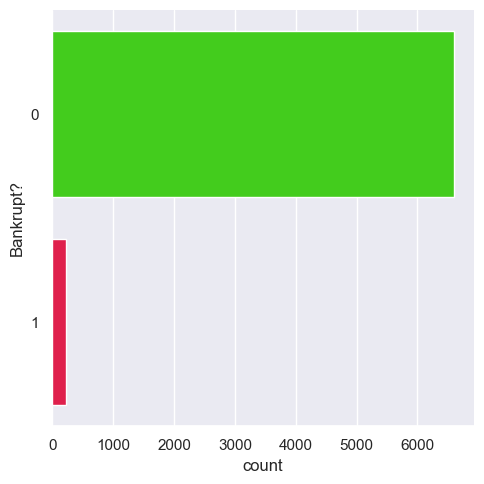

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [117]:
br_check = sb.catplot(y="Bankrupt?", data=bank_data, kind="count", palette= "prism")
plt.show()

bank_data['Bankrupt?'].value_counts()

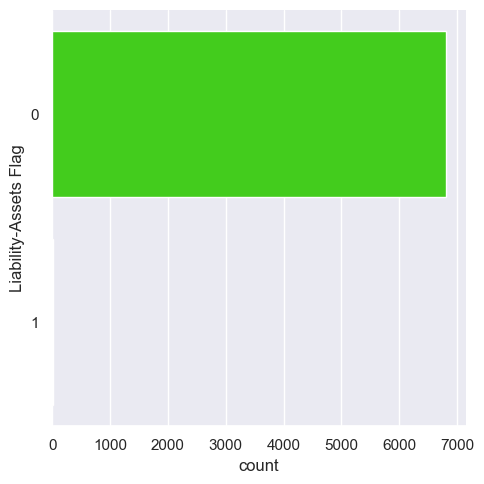

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64

In [115]:
liab_check = sb.catplot(y="Liability-Assets Flag", data=bank_data, kind="count", palette= "prism")
plt.show()

bank_data['Liability-Assets Flag'].value_counts()


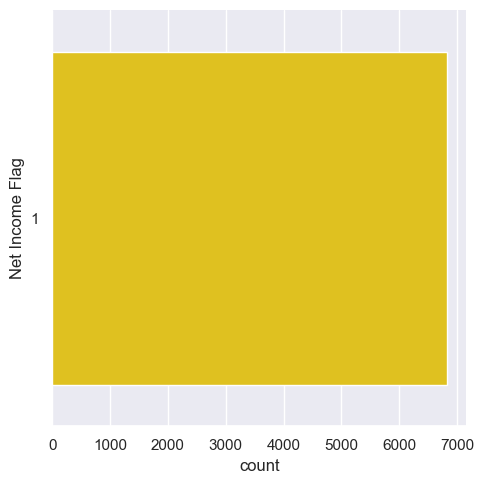

1    6819
Name: Net Income Flag, dtype: int64

In [116]:
neti_check = sb.catplot(y="Net Income Flag", data=bank_data, kind="count", palette= "prism")
plt.show()

bank_data['Net Income Flag'].value_counts()

In [119]:
#We can see that there is huge imabalace in the columns 'Liability-Assets Flag','Net Income Flag' and 'Net Income Flag' has only one 1 record in it. 
#These won't be used for our model prep and will be dropped now.

updated_bank_data = bank_data.drop(['Liability-Assets Flag','Net Income Flag'],axis=1)

In [121]:
updated_bank_data.shape

(6819, 94)

In [ ]:
#Now we will move on to check for outliers

for each_column in updated_bank_data:
    plt.show()
    updated_bank_data.boxplot([each_column])

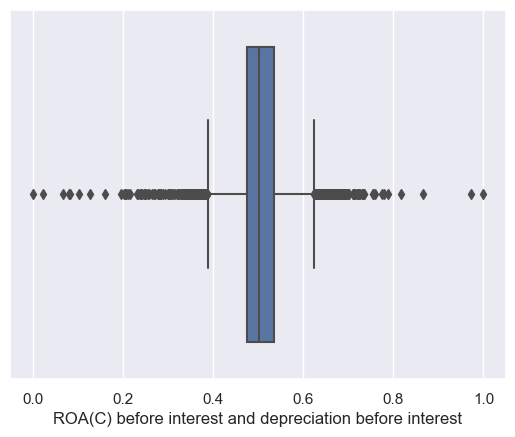

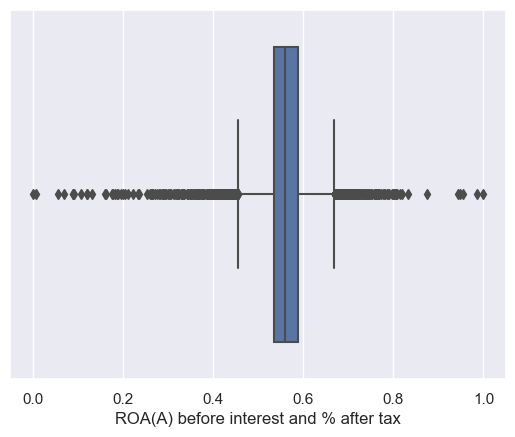

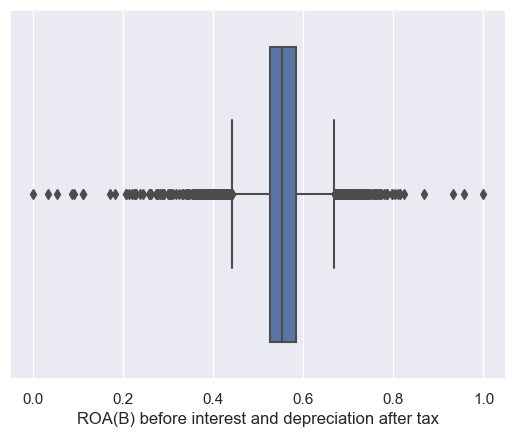

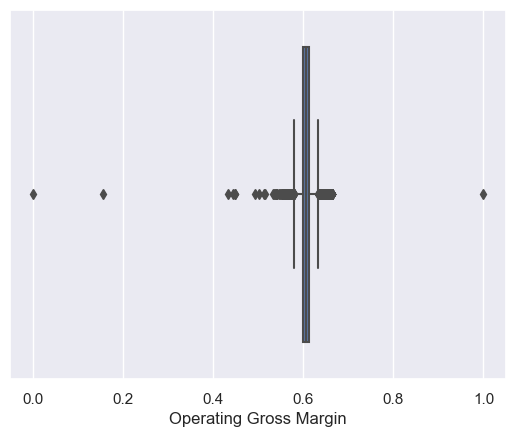

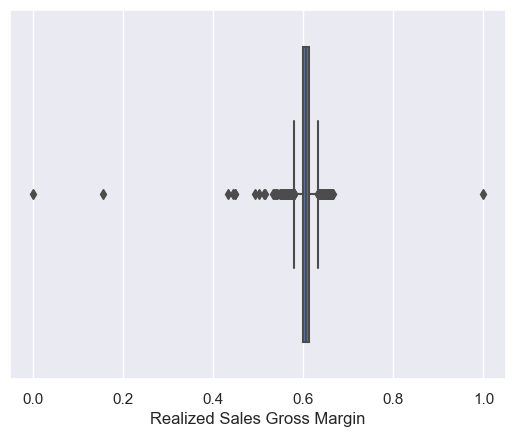

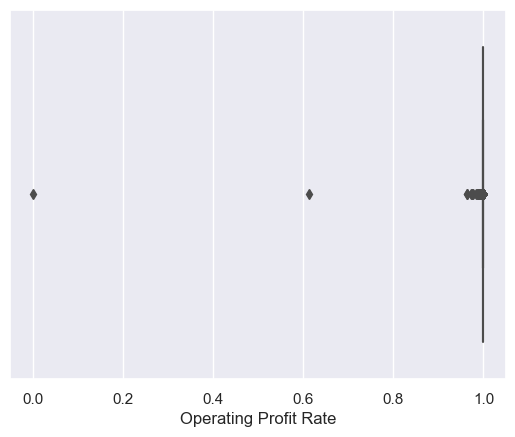

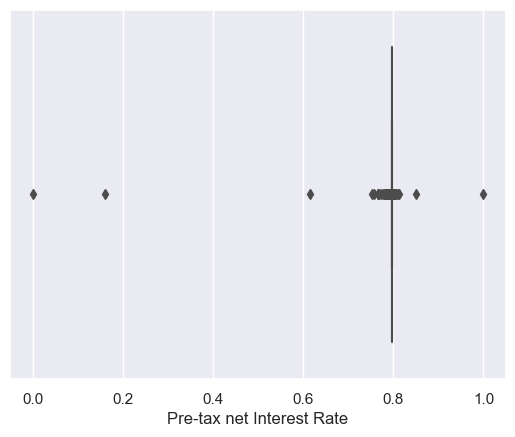

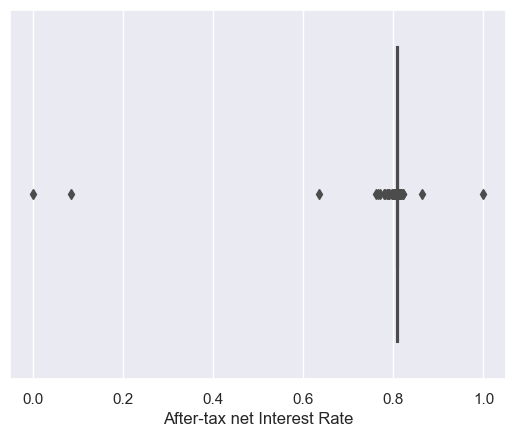

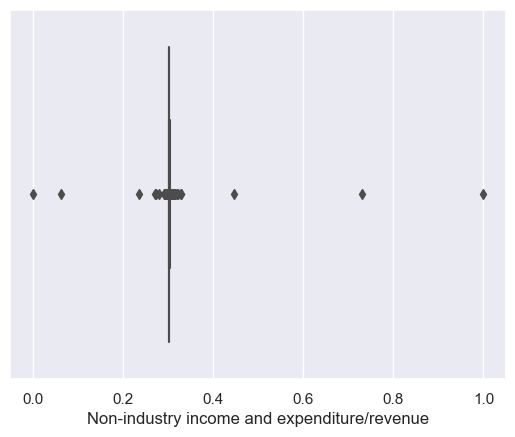

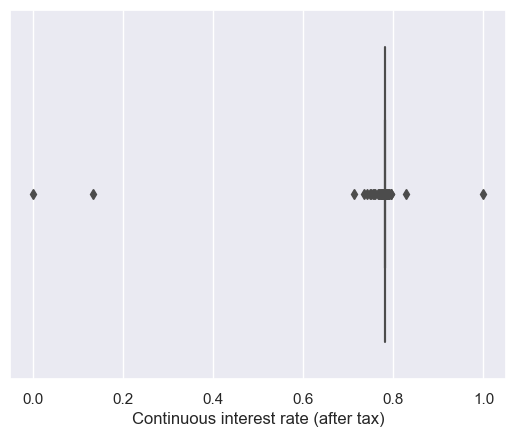

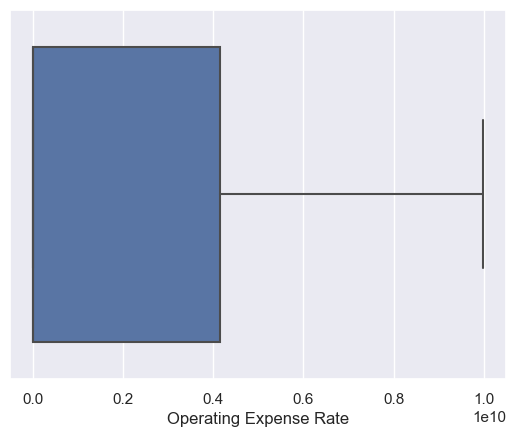

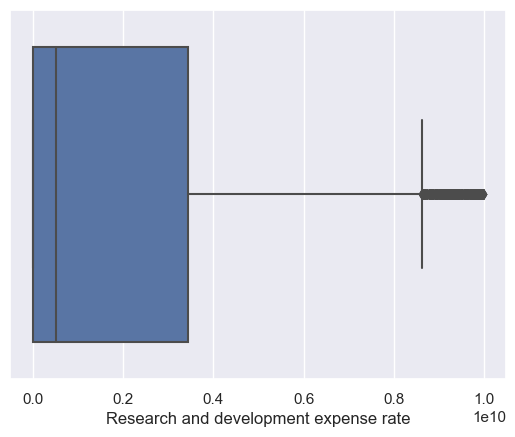

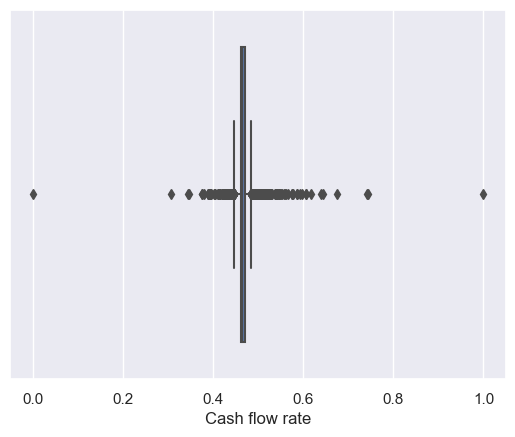

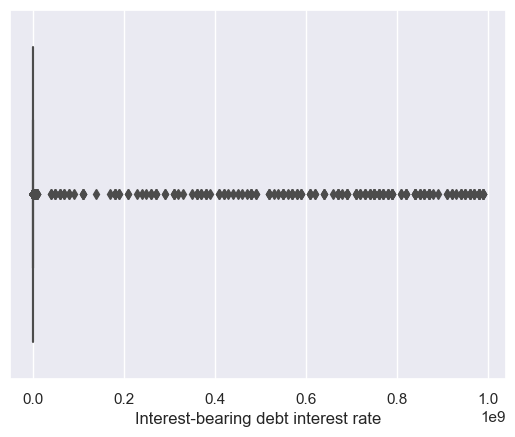

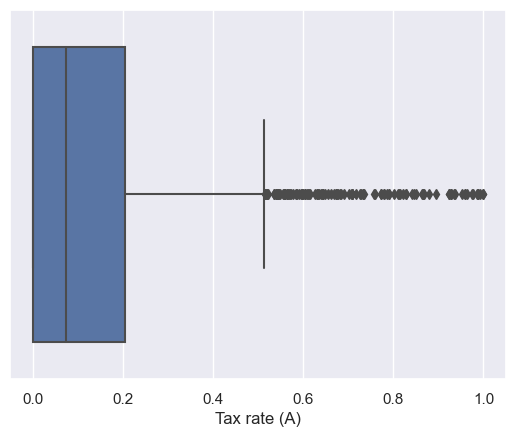

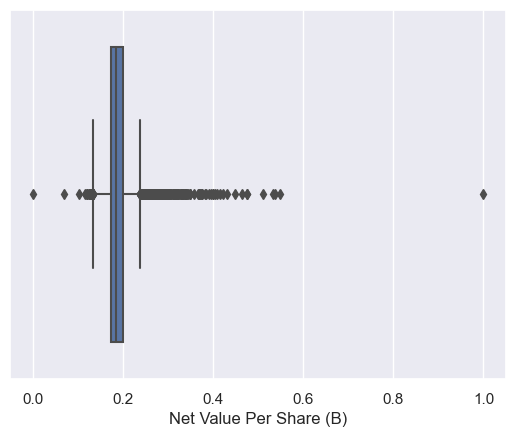

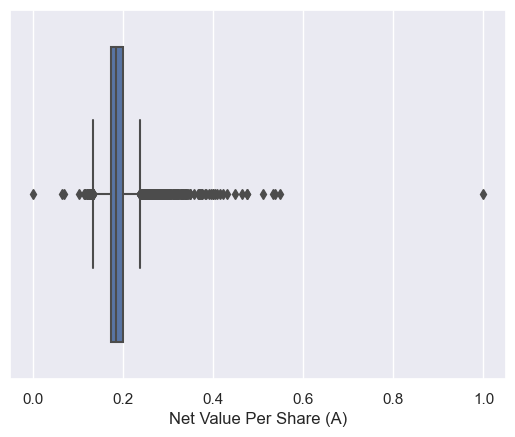

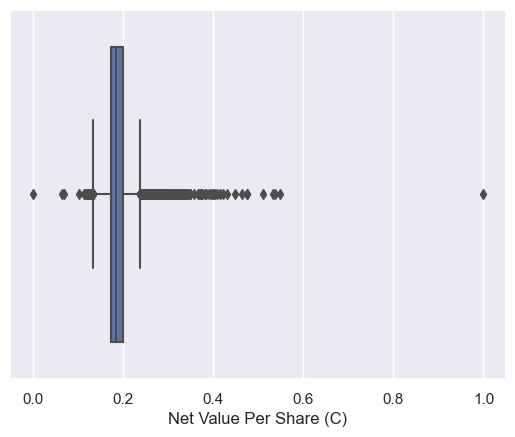

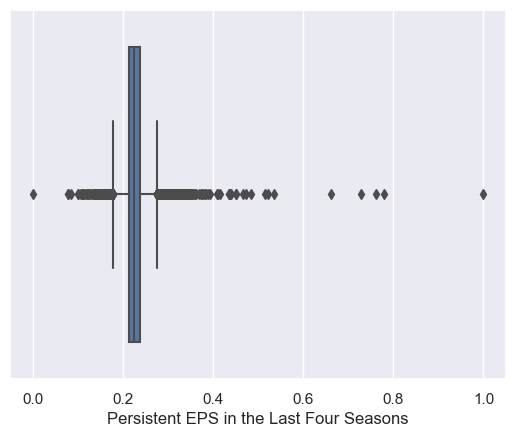

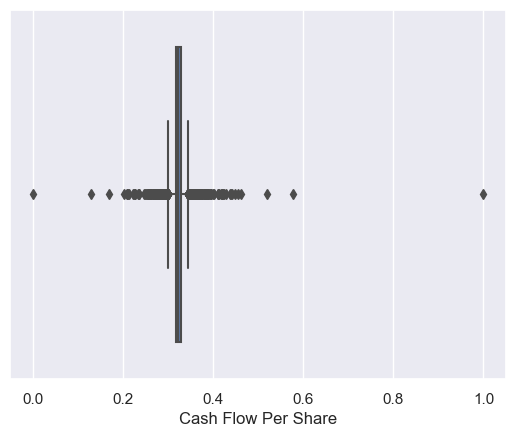

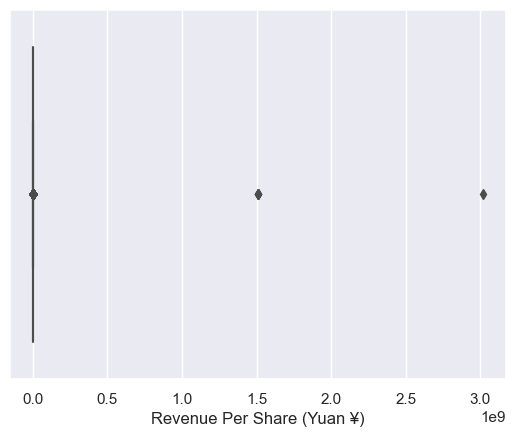

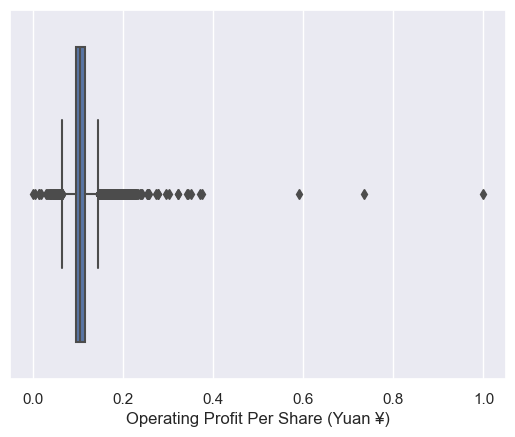

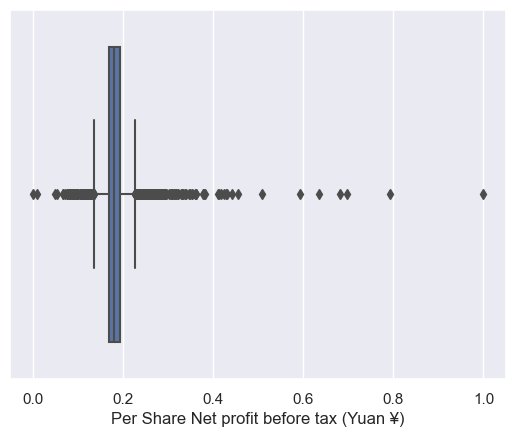

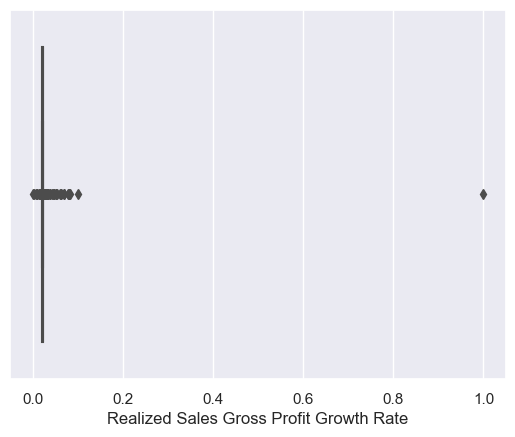

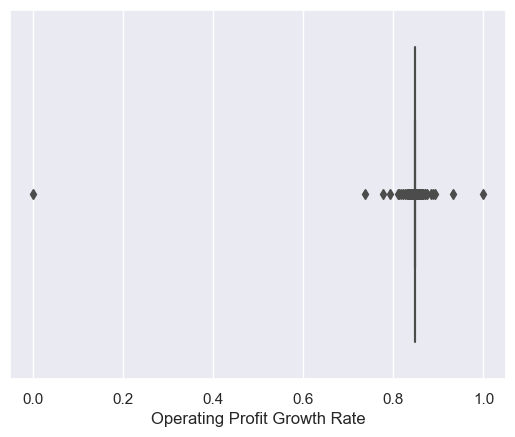

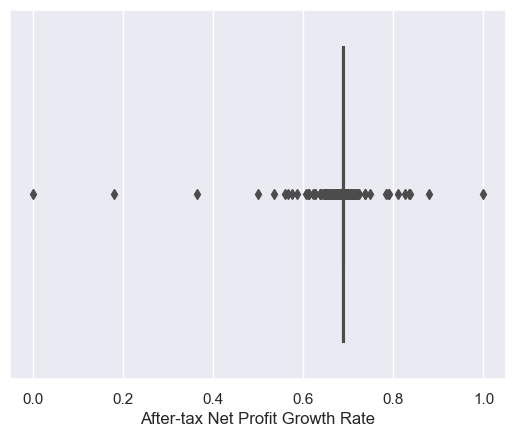

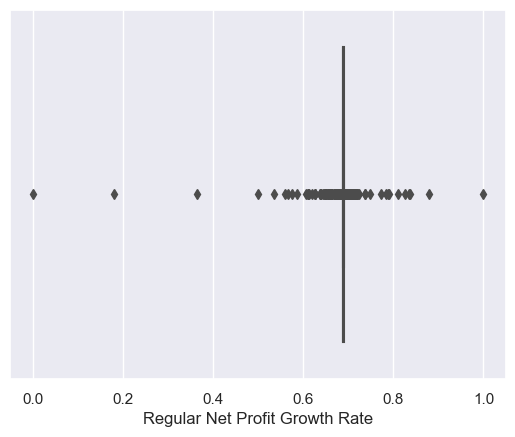

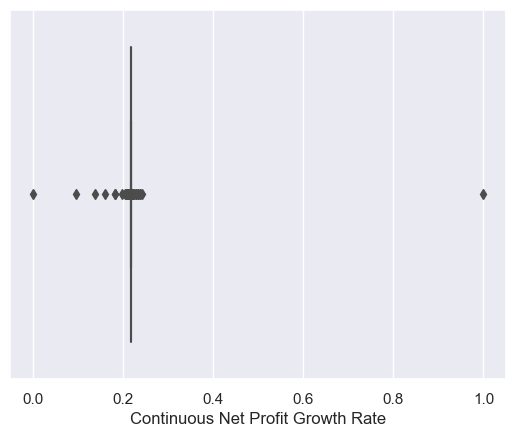

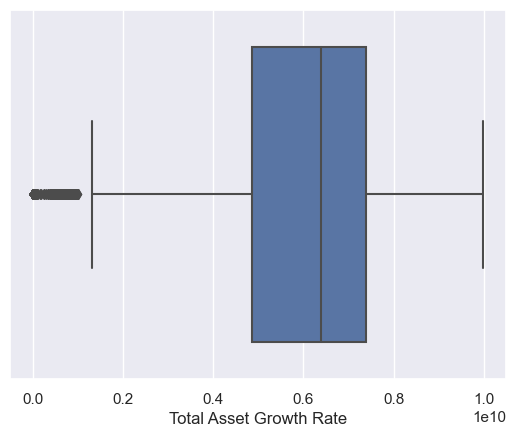

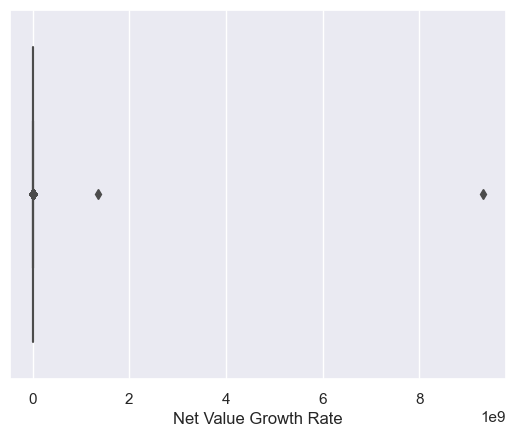

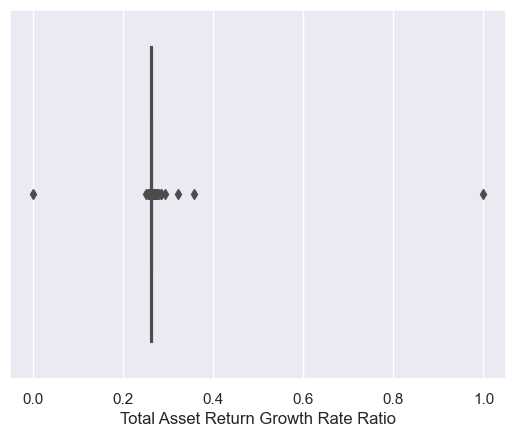

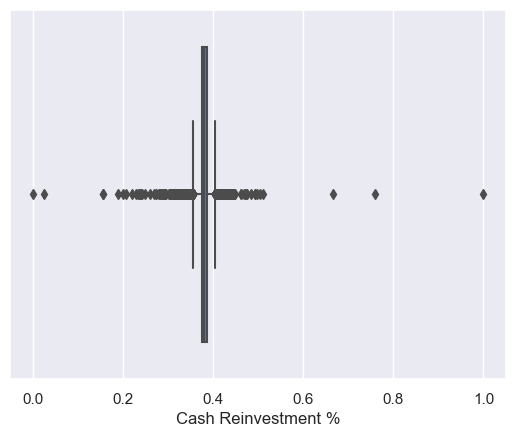

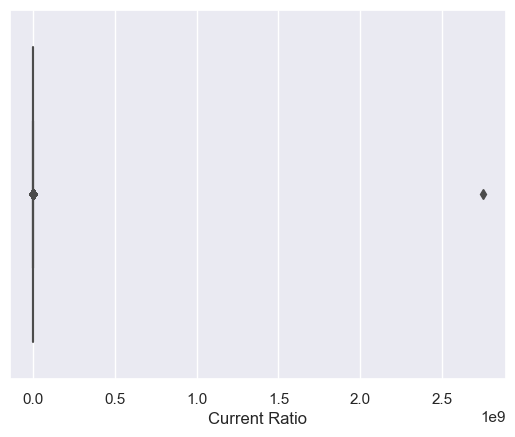

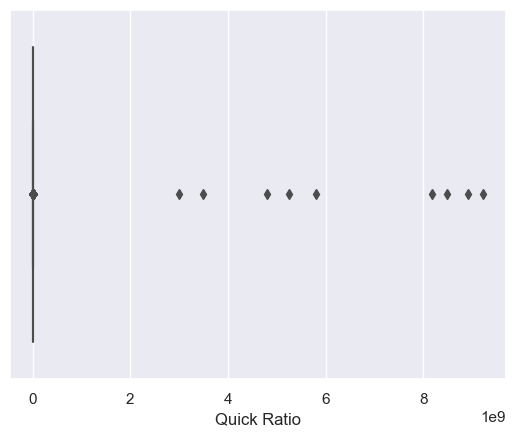

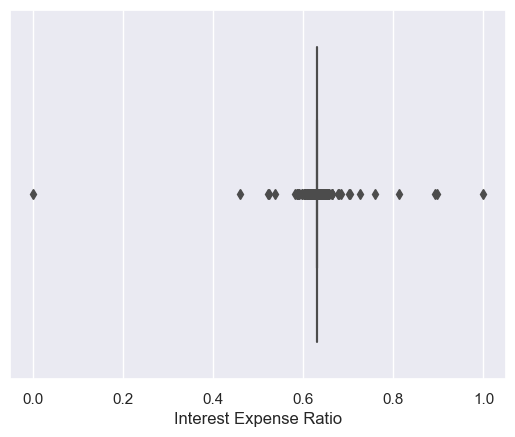

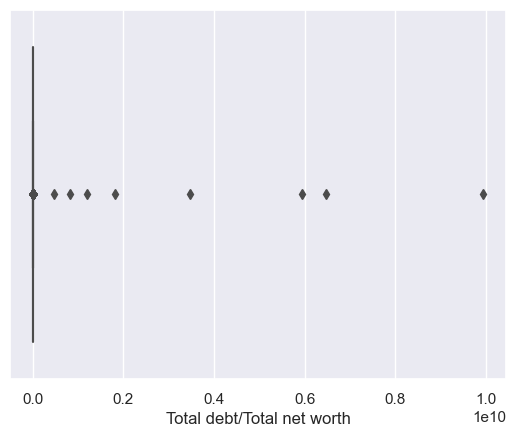

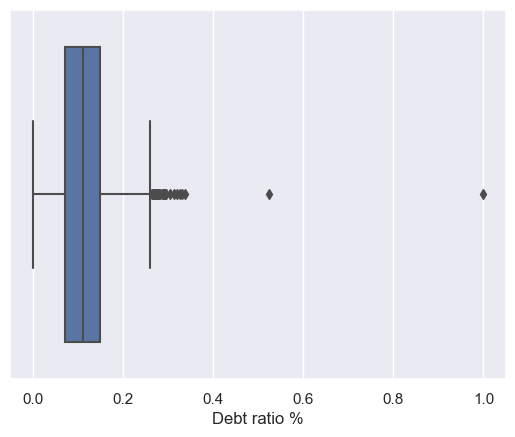

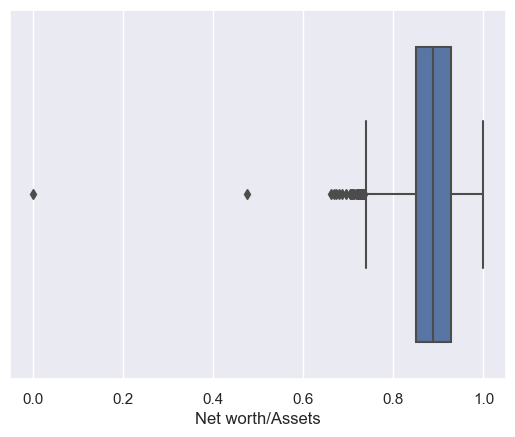

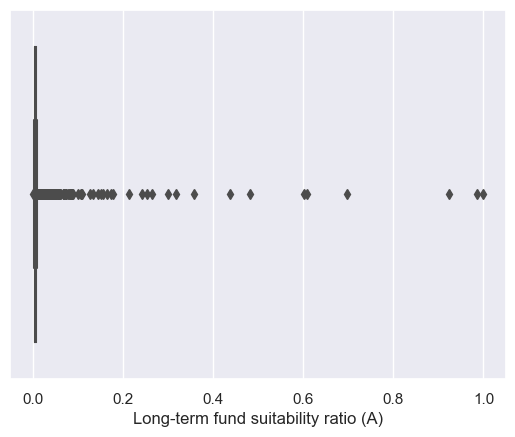

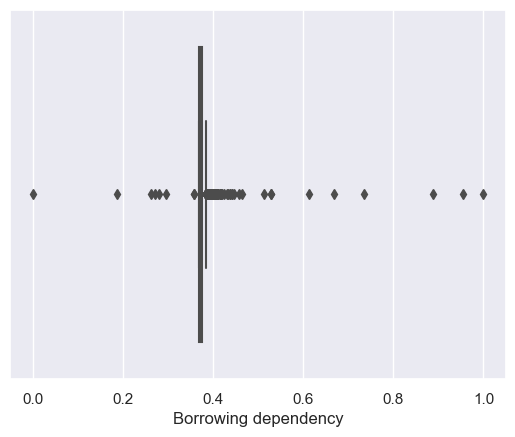

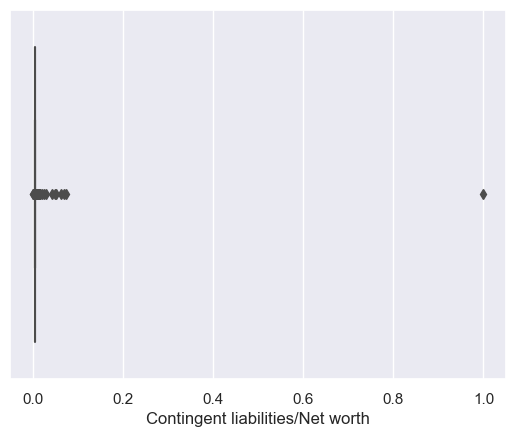

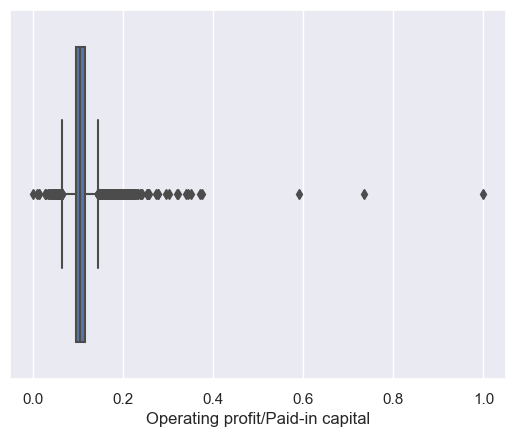

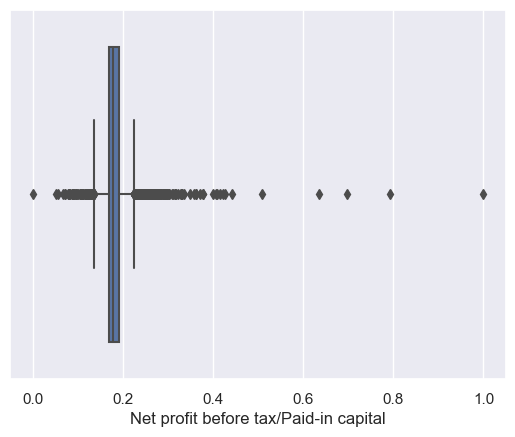

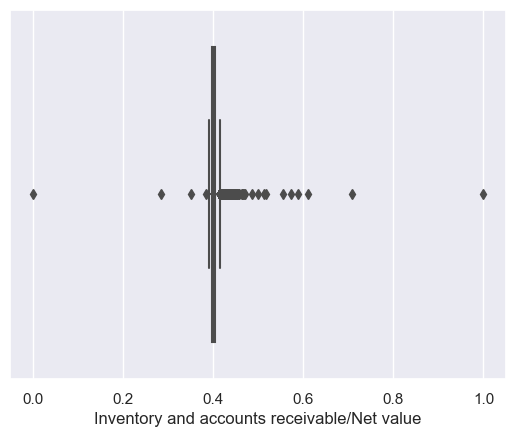

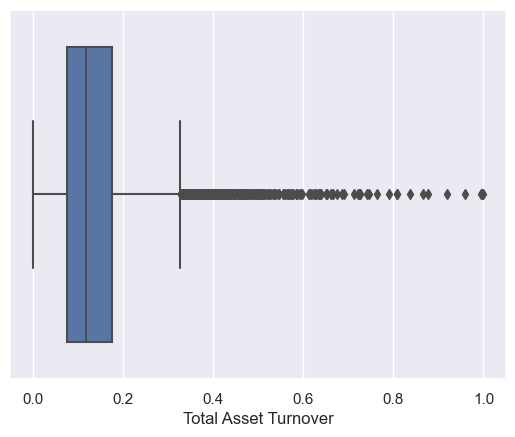

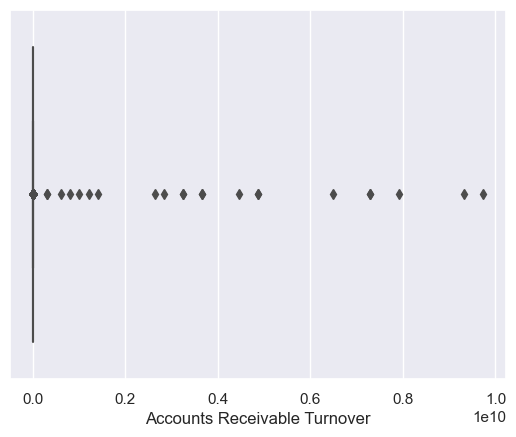

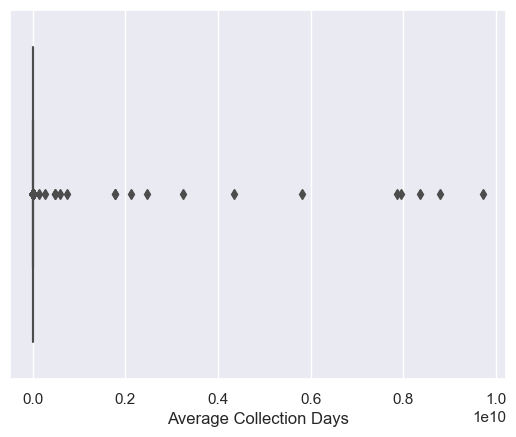

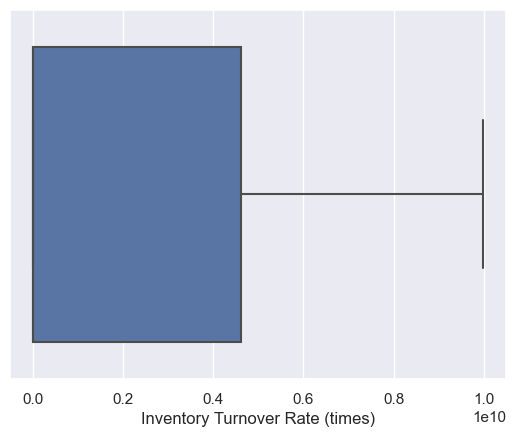

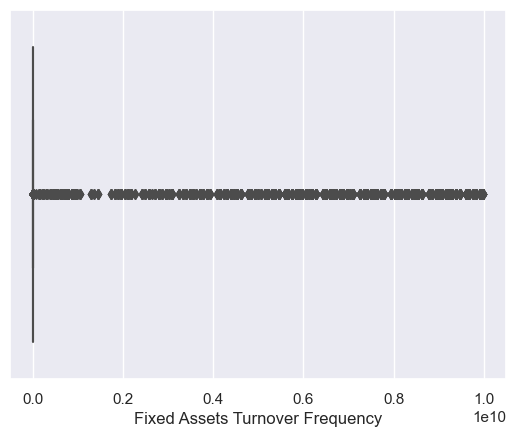

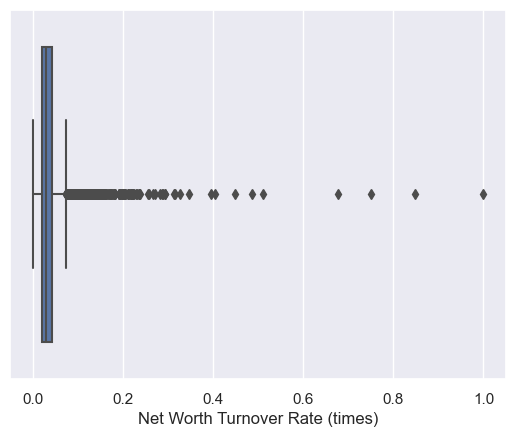

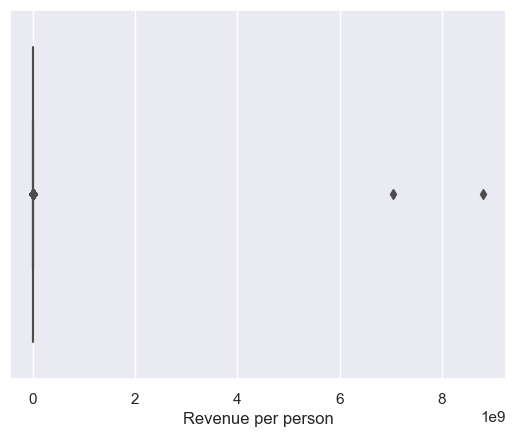

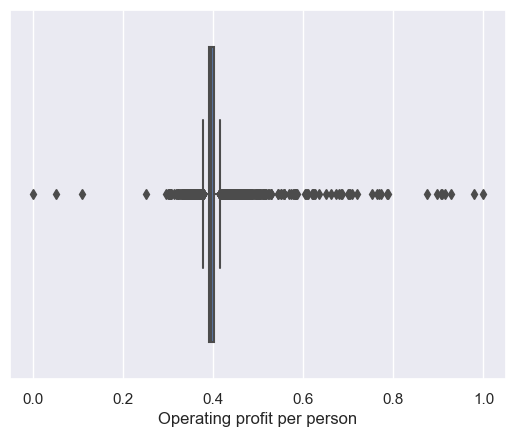

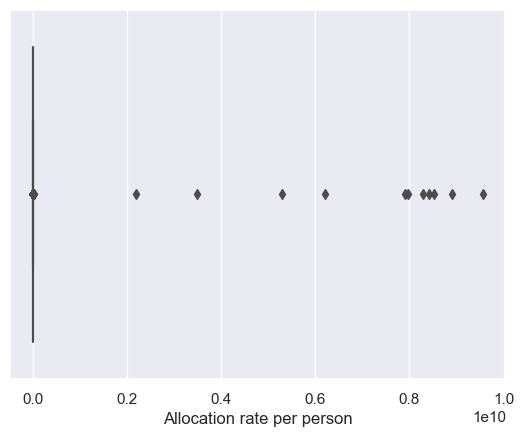

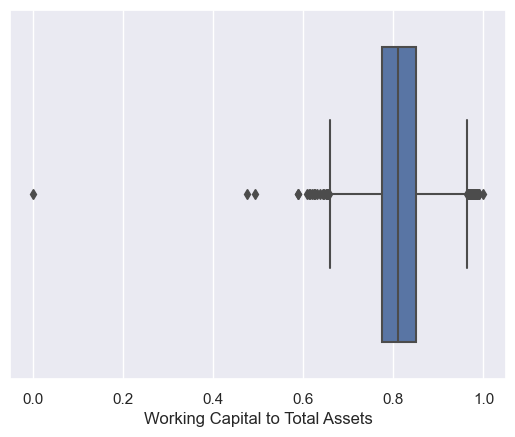

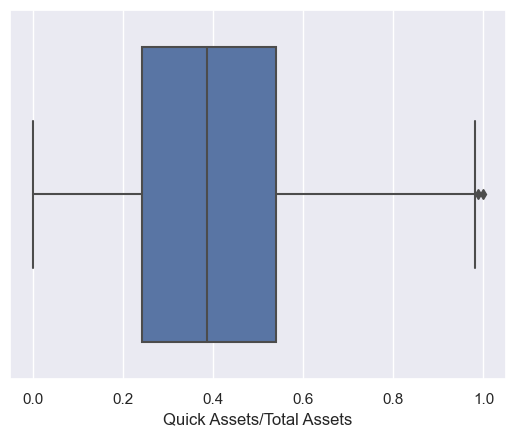

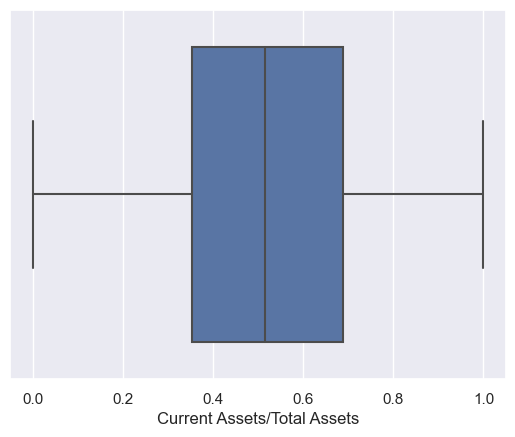

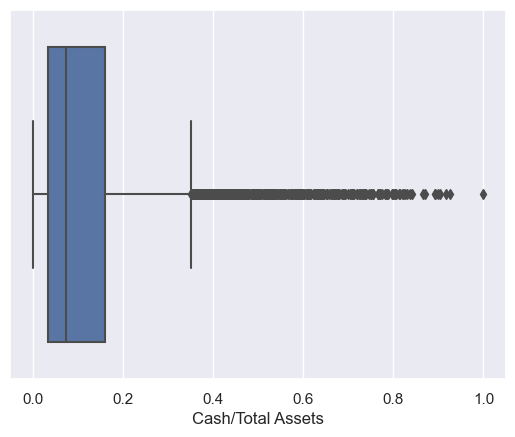

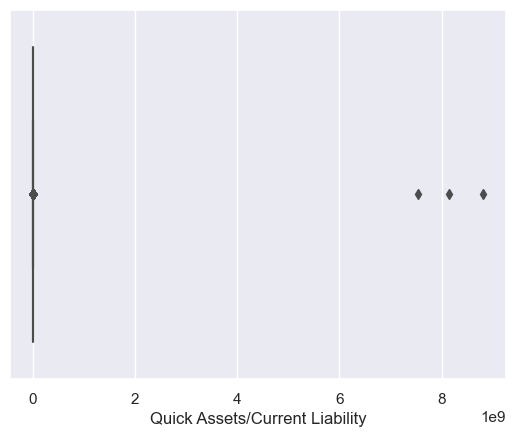

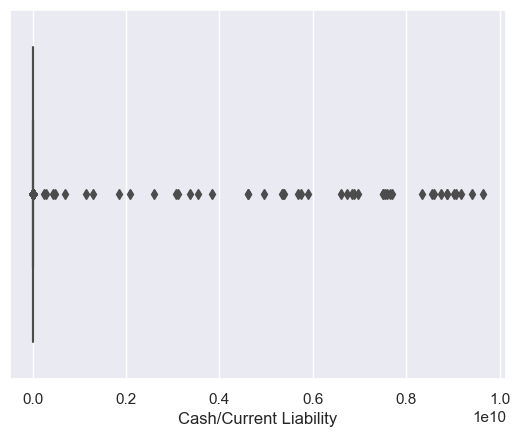

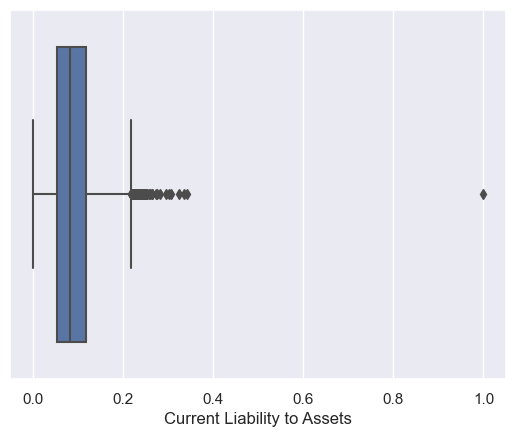

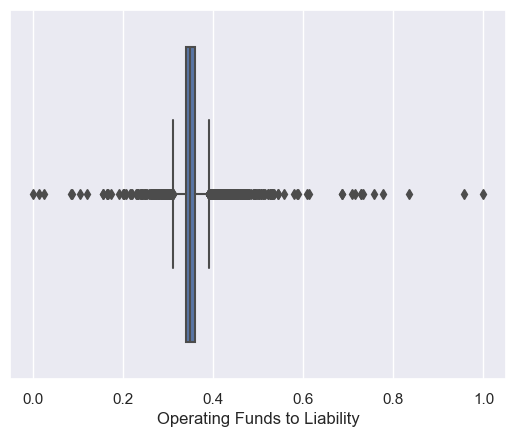

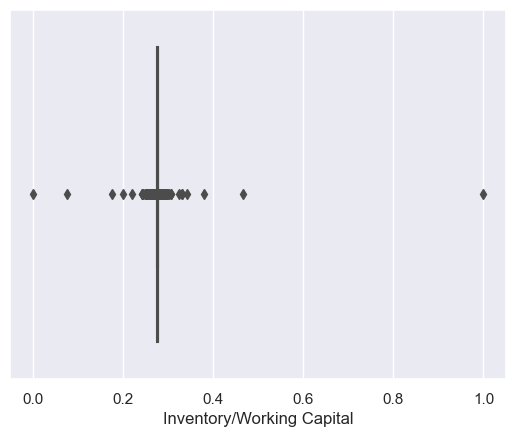

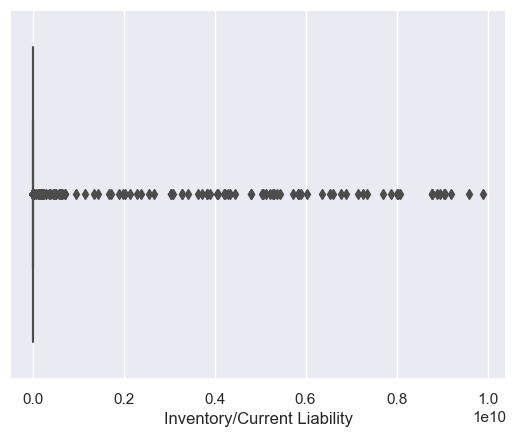

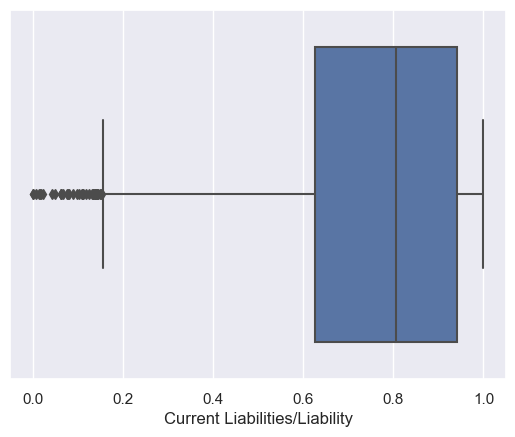

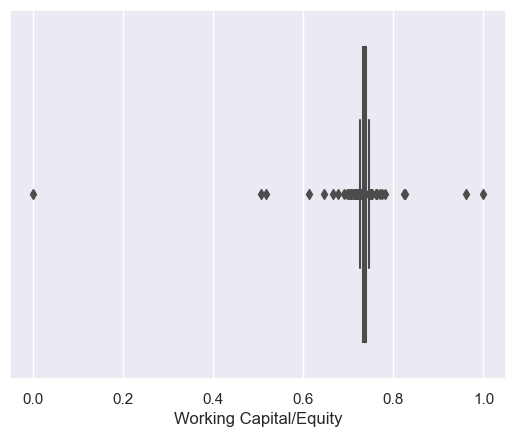

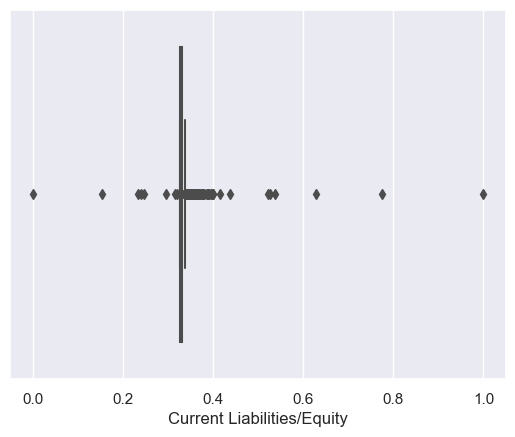

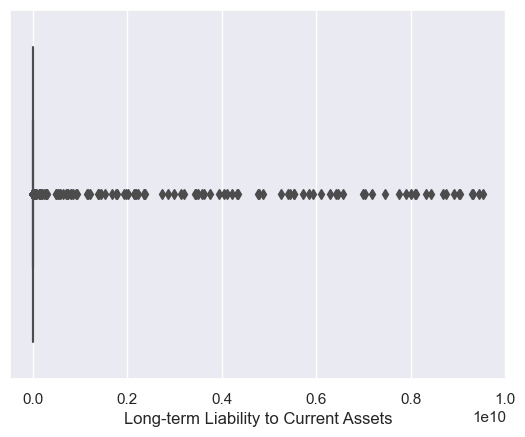

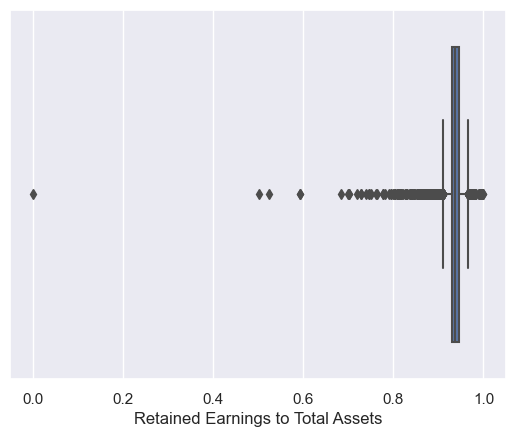

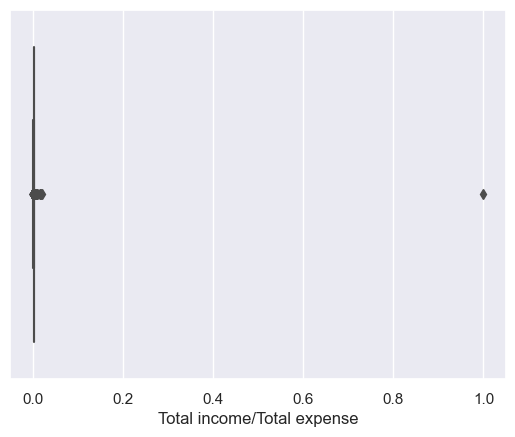

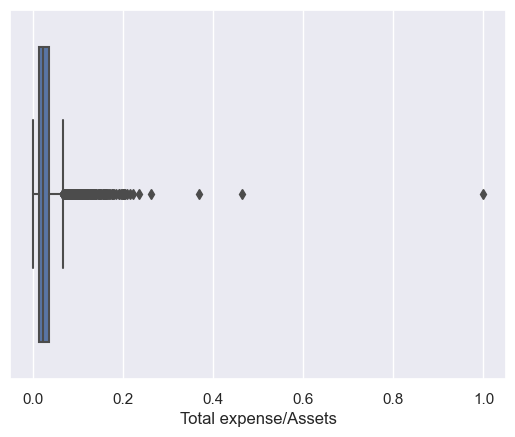

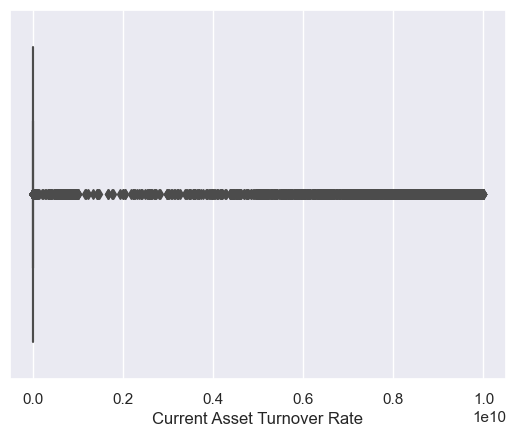

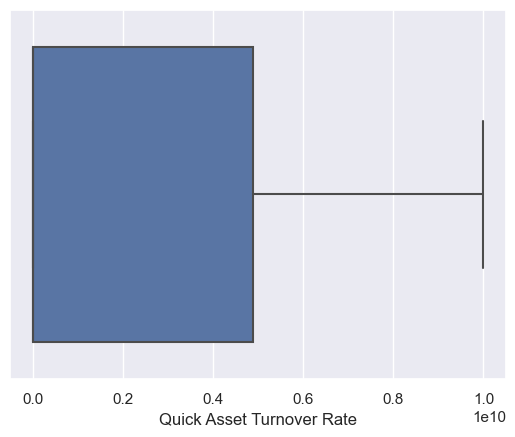

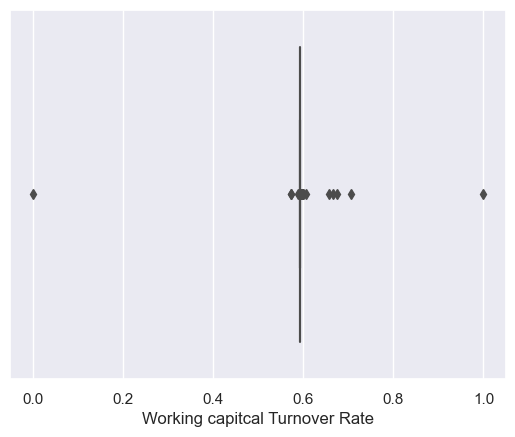

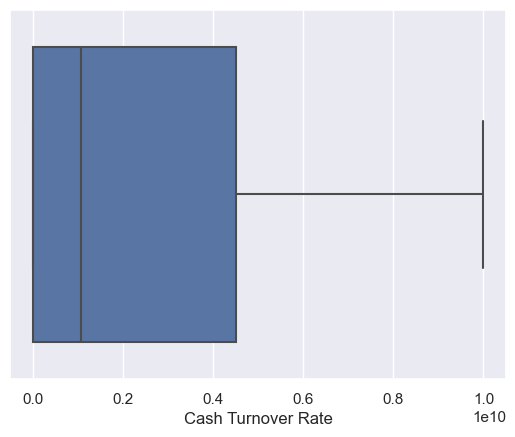

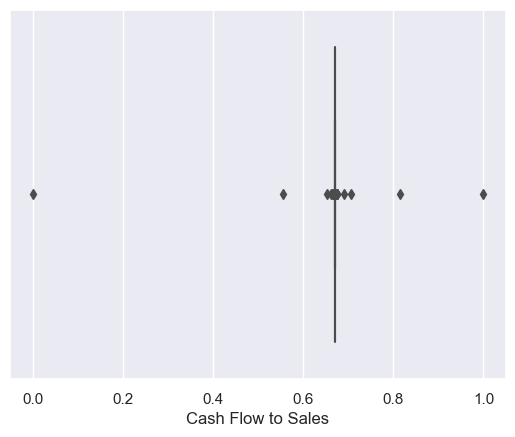

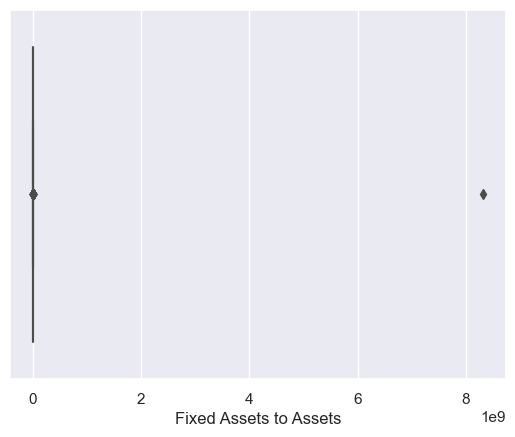

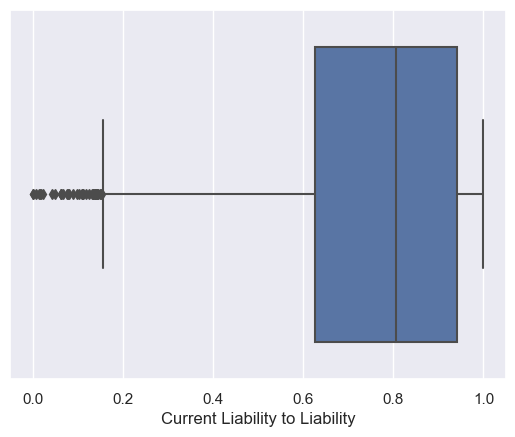

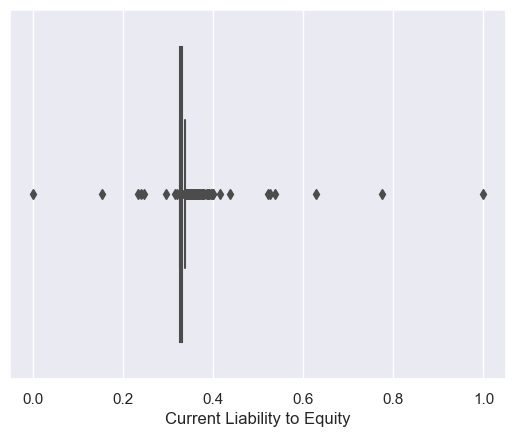

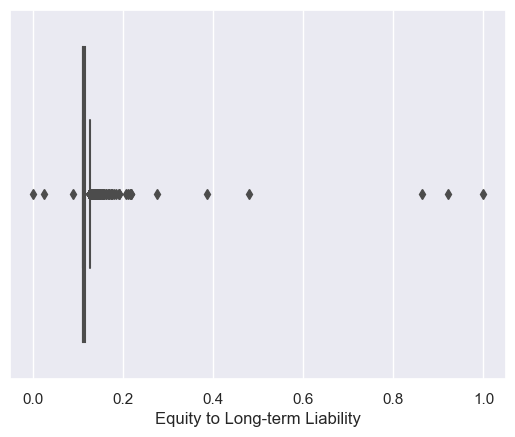

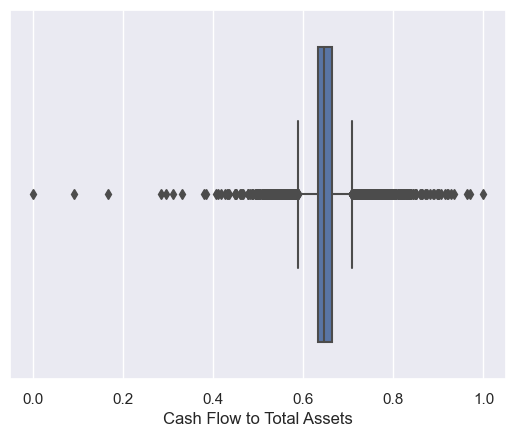

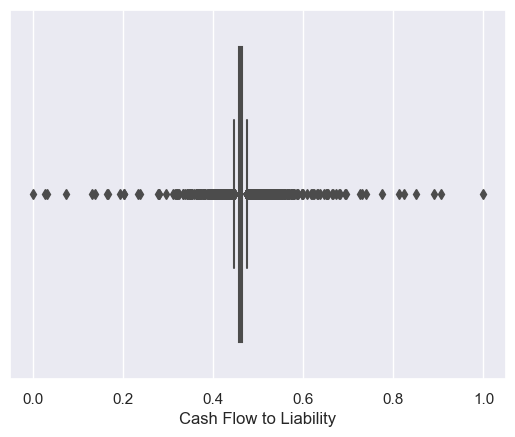

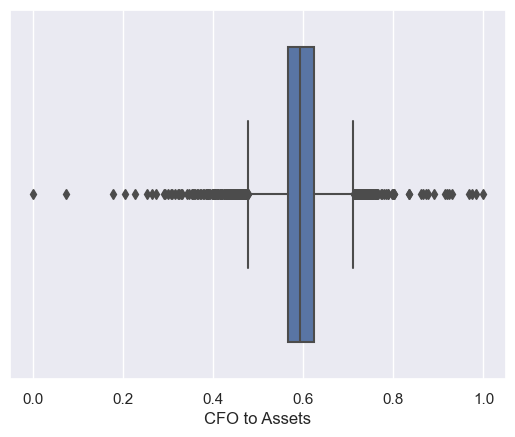

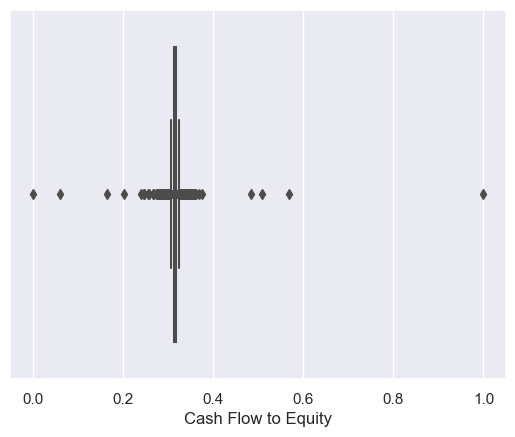

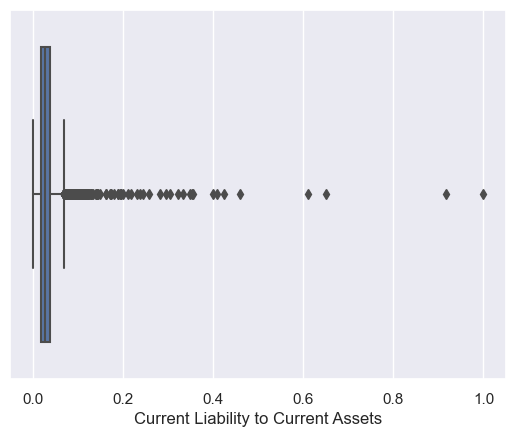

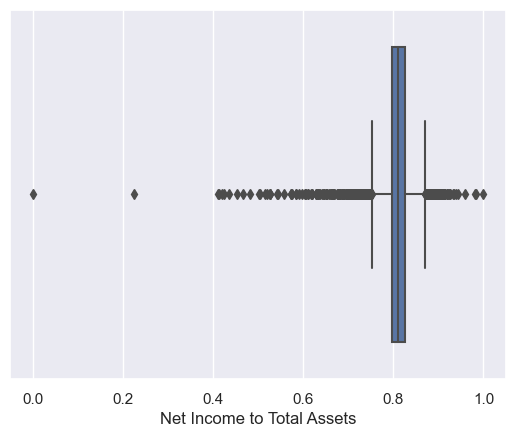

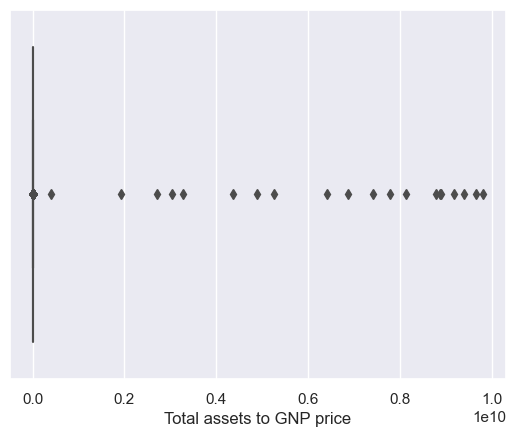

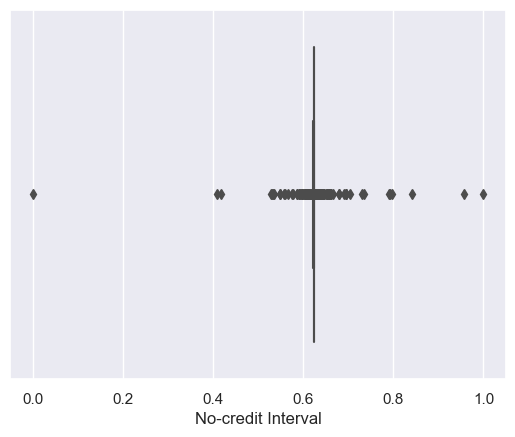

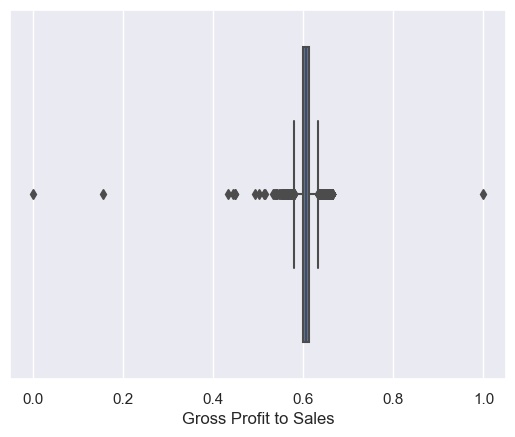

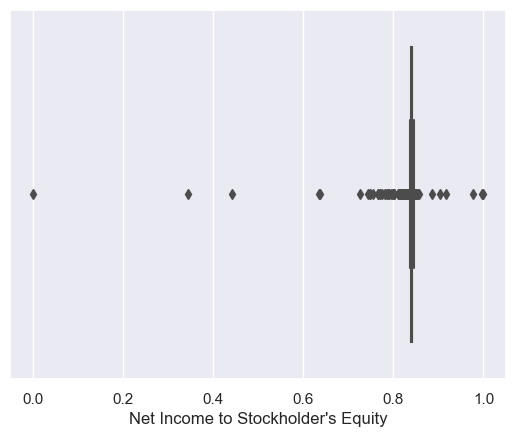

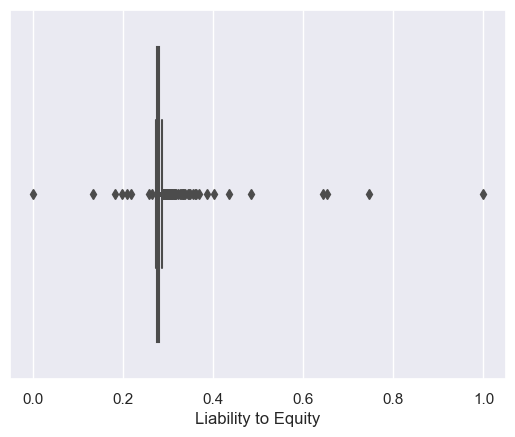

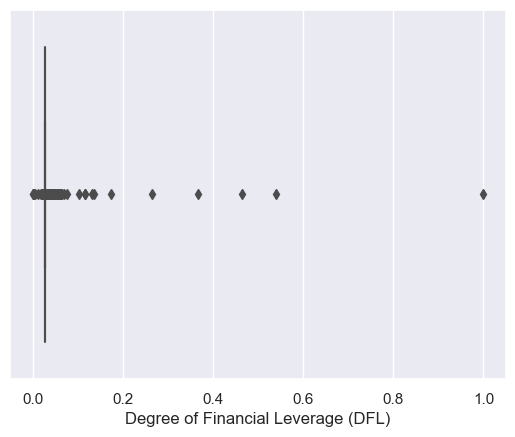

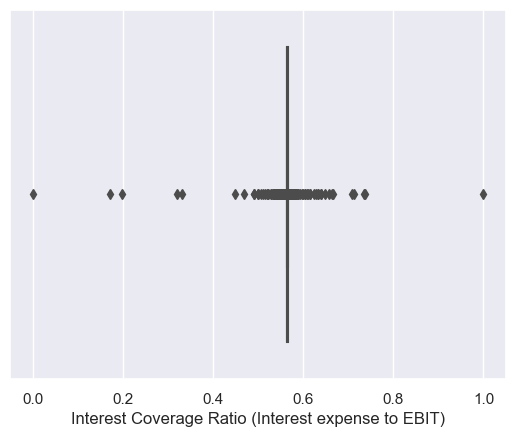

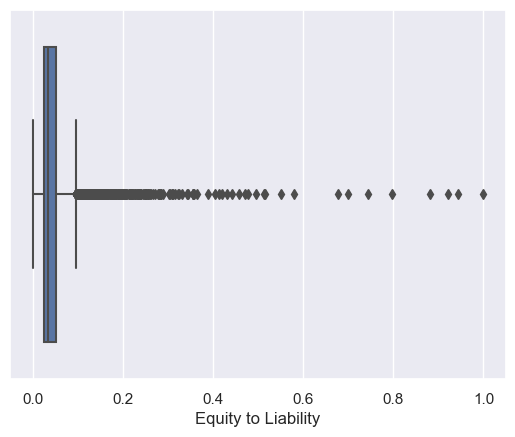

In [134]:
for i in updated_bank_data.columns:
        if i=='Bankrupt?':
            continue
        else:
            sb.boxplot(x = updated_bank_data[i])
            plt.show()

In [137]:
#There are a lot of outliers in each of the columns so lets handle that now usign IQR method
def handle_outlier(dataframe,target):
    for i in dataframe.columns:
        if i==target:
            continue
        else:
            print(i)
            # find q1
            q1 = dataframe[i].quantile(0.25)
            # find q3 
            q3 = dataframe[i].quantile(0.75)
            # calculate iqr
            iqr = q3-q1

            # find upper limit
            upper_limit = q3+1.5*iqr

            # find lower limit 
            lower_limit = q1-1.5*iqr

            dataframe[i] = np.where(dataframe[i]>upper_limit,upper_limit,np.where(dataframe[i]<lower_limit,lower_limit,dataframe[i]))
        
    return dataframe[i]

In [139]:
handle_outlier(updated_bank_data,'Bankrupt?')

ROA(C) before interest and depreciation before interest
ROA(A) before interest and % after tax
ROA(B) before interest and depreciation after tax
Operating Gross Margin
Realized Sales Gross Margin
Operating Profit Rate
Pre-tax net Interest Rate
After-tax net Interest Rate
Non-industry income and expenditure/revenue
Continuous interest rate (after tax)
Operating Expense Rate
Research and development expense rate
Cash flow rate
Interest-bearing debt interest rate
Tax rate (A)
Net Value Per Share (B)
Net Value Per Share (A)
Net Value Per Share (C)
Persistent EPS in the Last Four Seasons
Cash Flow Per Share
Revenue Per Share (Yuan ¥)
Operating Profit Per Share (Yuan ¥)
Per Share Net profit before tax (Yuan ¥)
Realized Sales Gross Profit Growth Rate
Operating Profit Growth Rate
After-tax Net Profit Growth Rate
Regular Net Profit Growth Rate
Continuous Net Profit Growth Rate
Total Asset Growth Rate
Net Value Growth Rate
Total Asset Return Growth Rate Ratio
Cash Reinvestment %
Current Ratio
Qu

0       0.016469
1       0.020794
2       0.016474
3       0.023982
4       0.035490
5       0.019534
6       0.015663
7       0.034889
8       0.065826
9       0.030801
10      0.036572
11      0.040381
12      0.025282
13      0.035464
14      0.042646
15      0.038354
16      0.062940
17      0.048822
18      0.025953
19      0.049622
20      0.039507
21      0.037680
22      0.024915
23      0.018005
24      0.017839
25      0.024869
26      0.041465
27      0.095380
28      0.042682
29      0.015349
30      0.014562
31      0.016404
32      0.032086
33      0.061887
34      0.030024
35      0.030431
36      0.026387
37      0.024781
38      0.039935
39      0.047960
40      0.031485
41      0.055858
42      0.044195
43      0.026674
44      0.041906
45      0.040450
46      0.038105
47      0.025829
48      0.017125
49      0.018998
50      0.023491
51      0.041680
52      0.074266
53      0.040601
54      0.016199
55      0.014054
56      0.009178
57      0.015186
58      0.0169

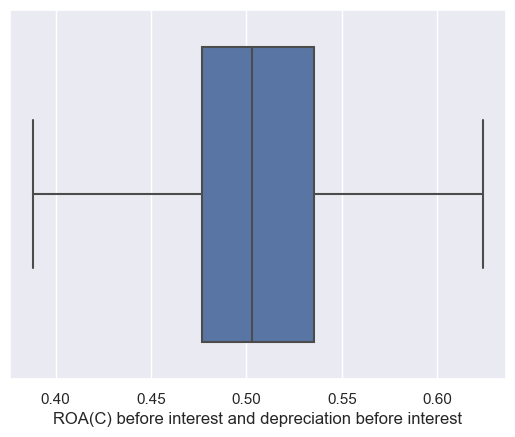

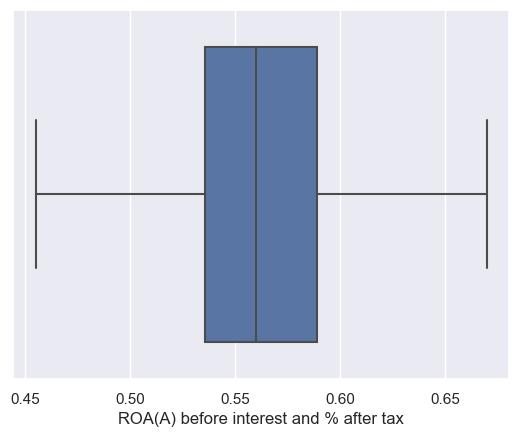

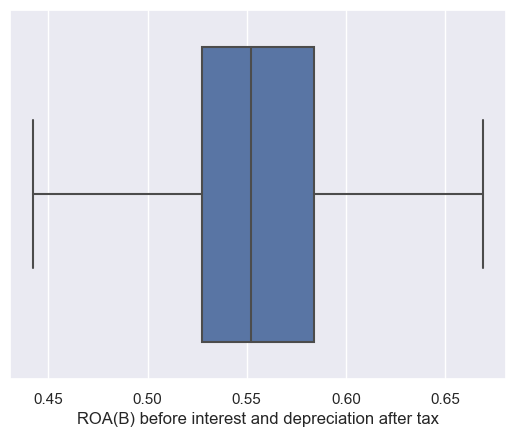

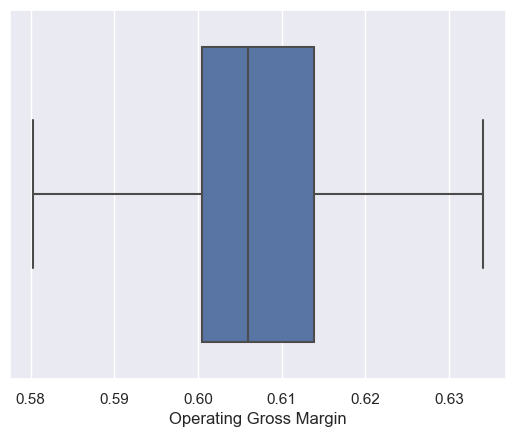

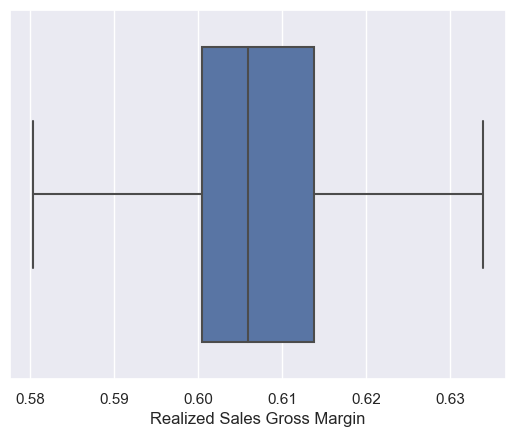

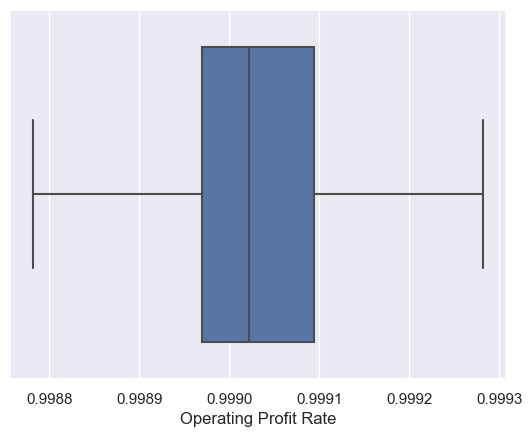

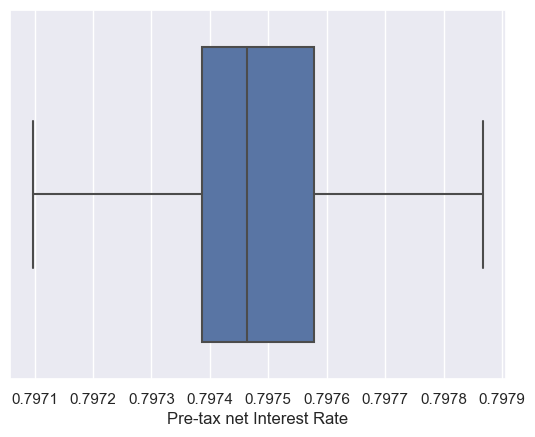

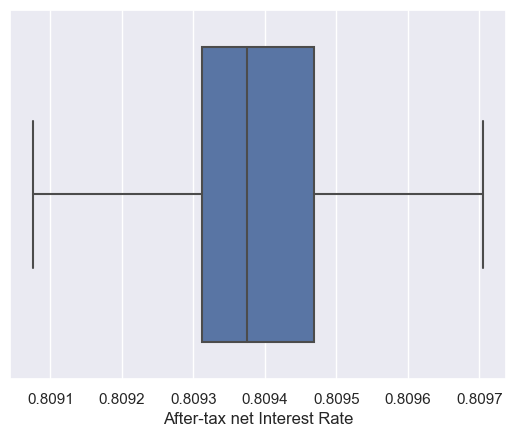

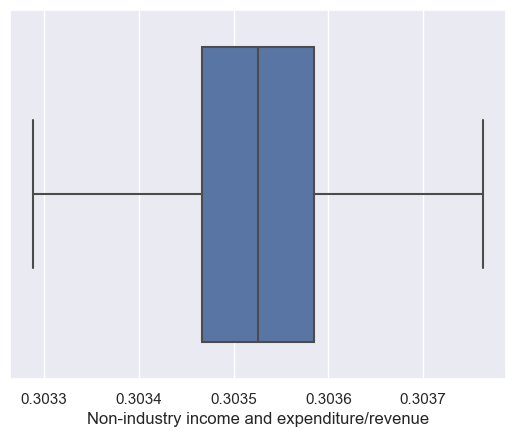

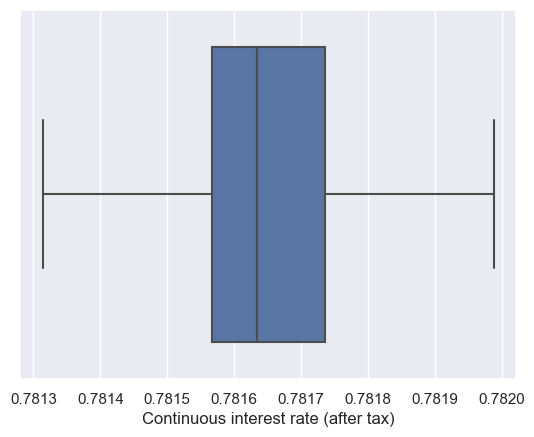

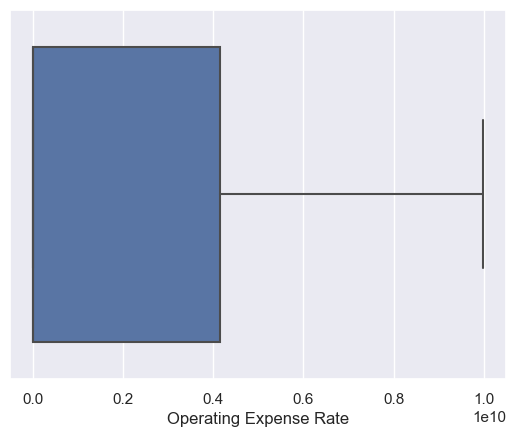

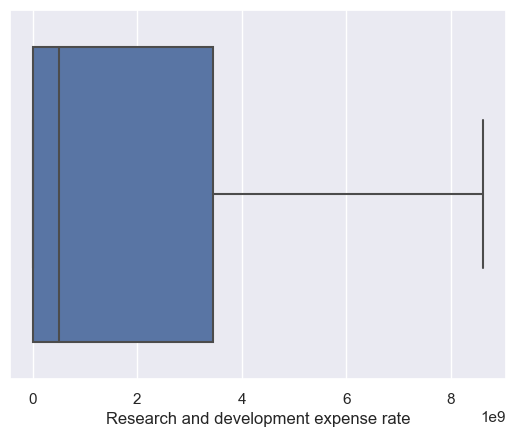

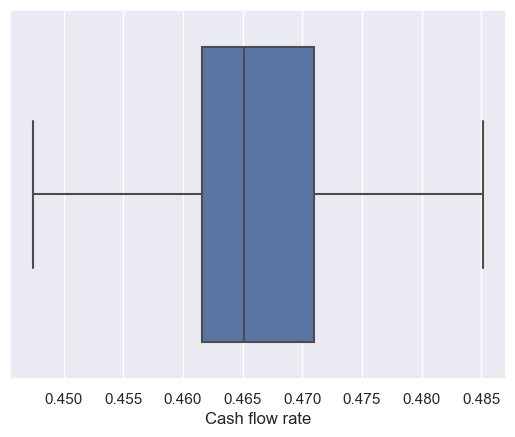

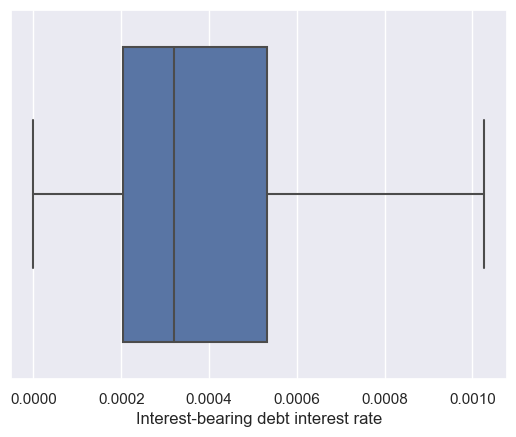

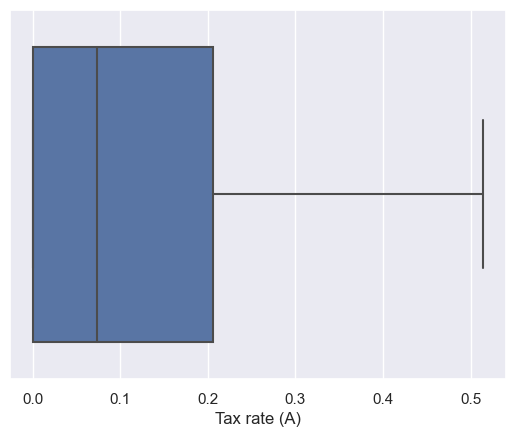

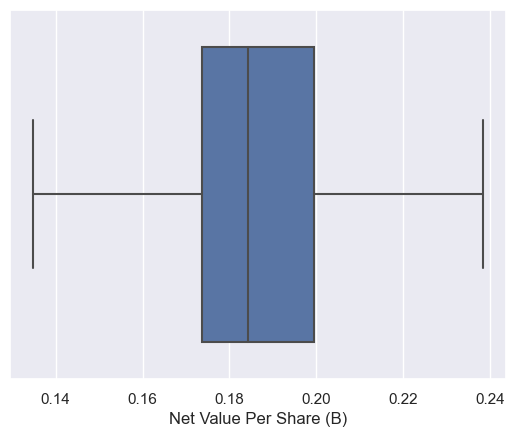

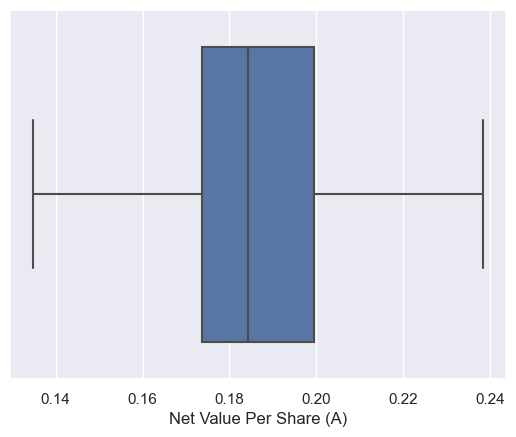

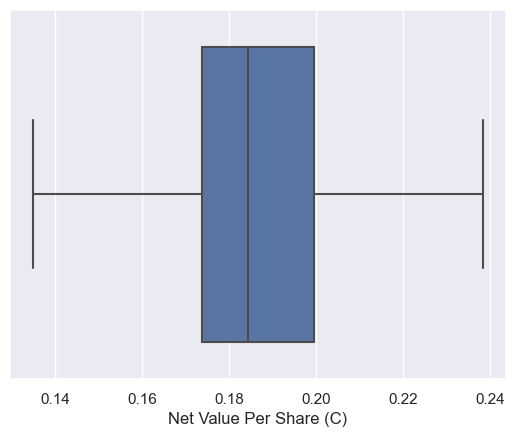

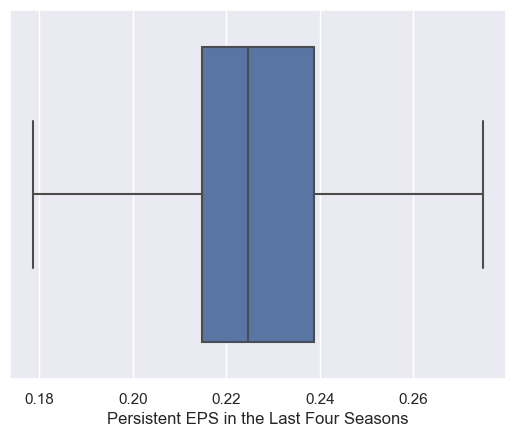

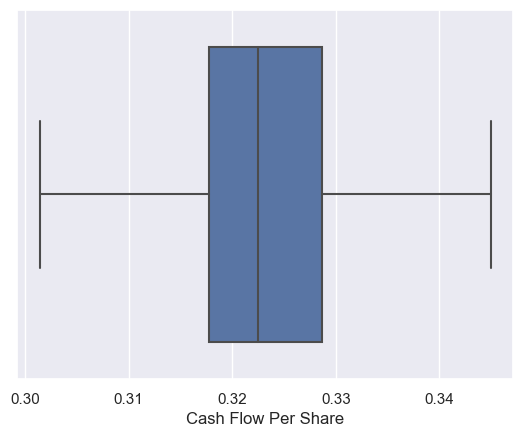

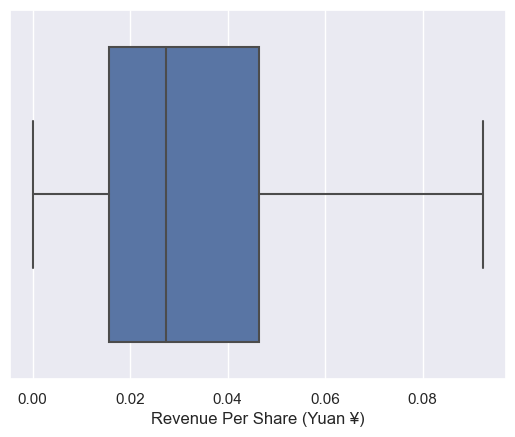

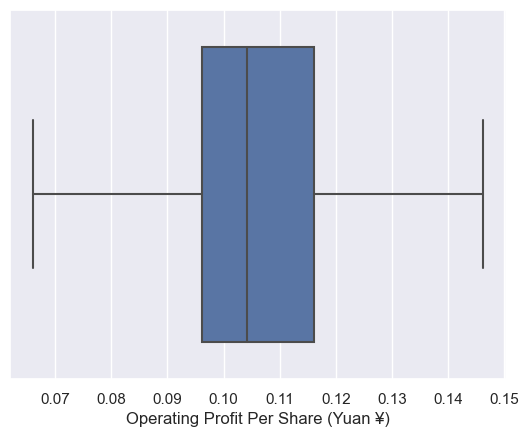

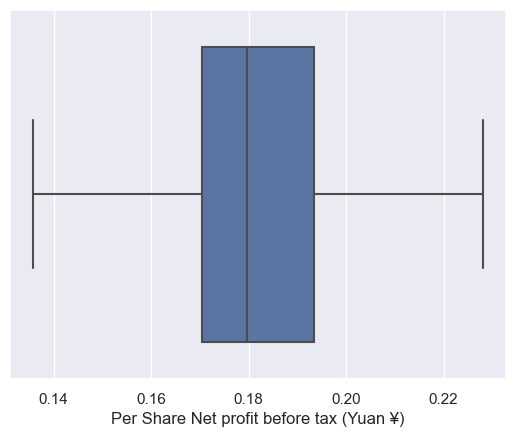

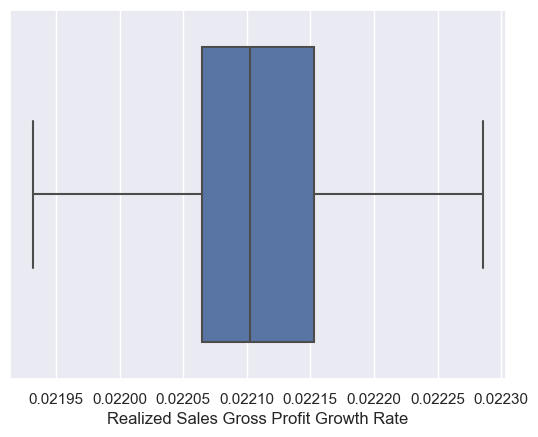

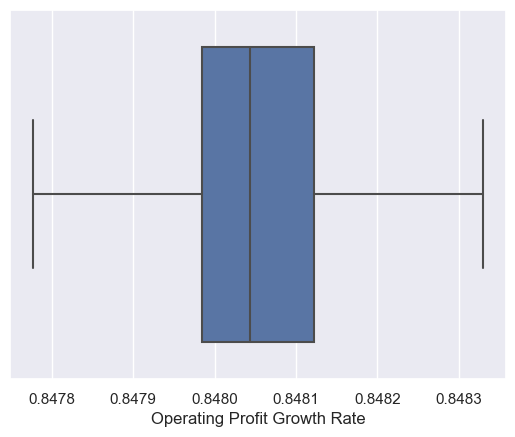

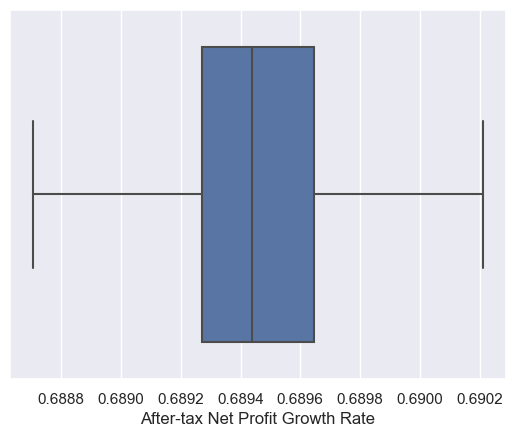

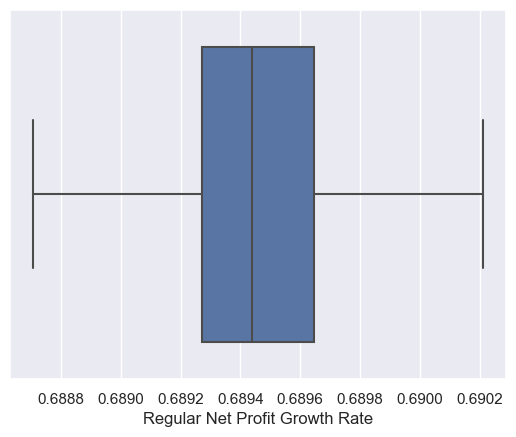

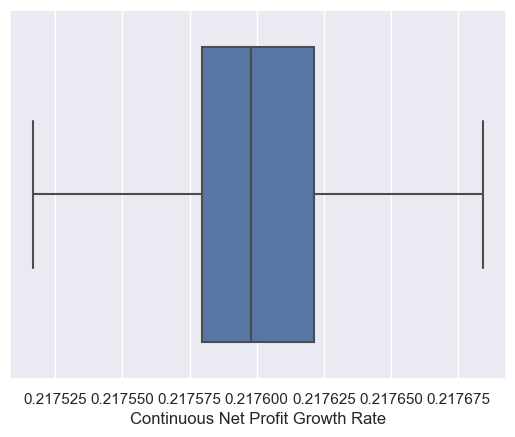

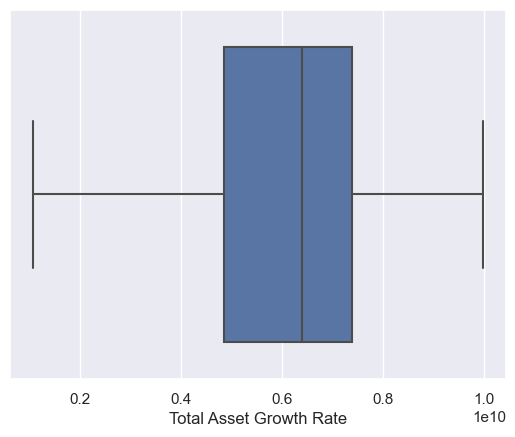

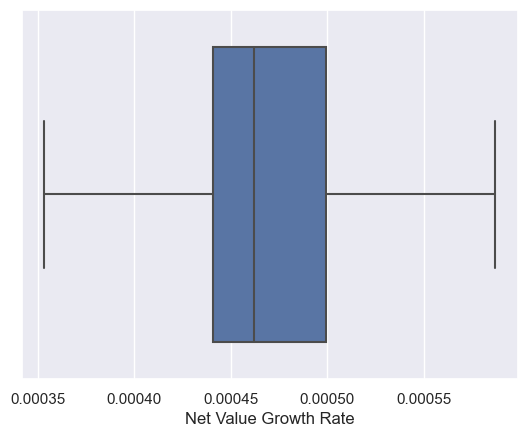

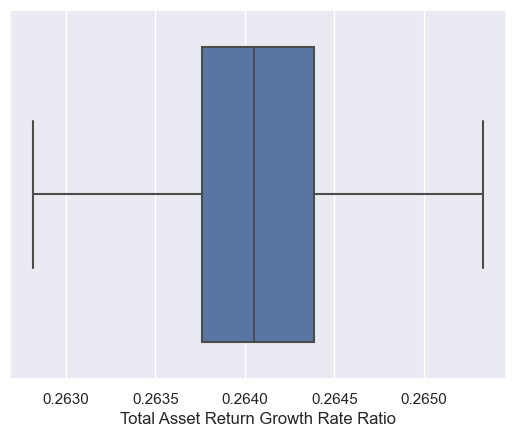

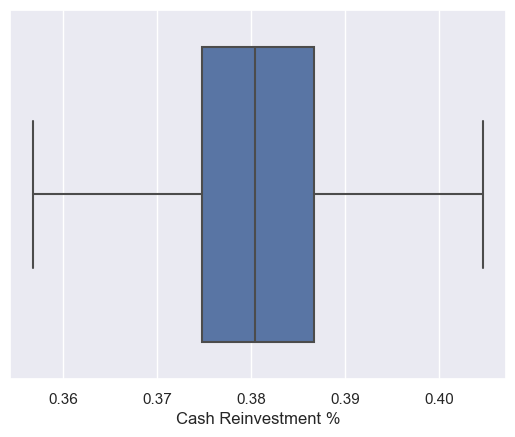

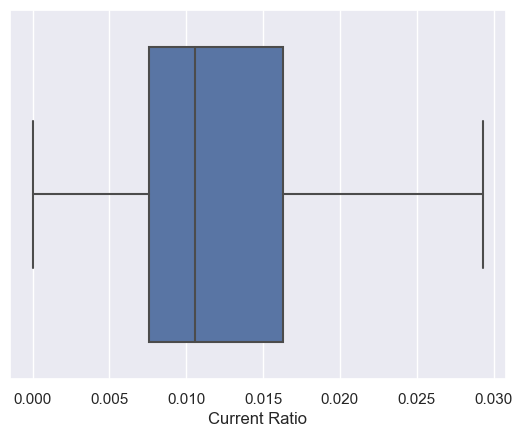

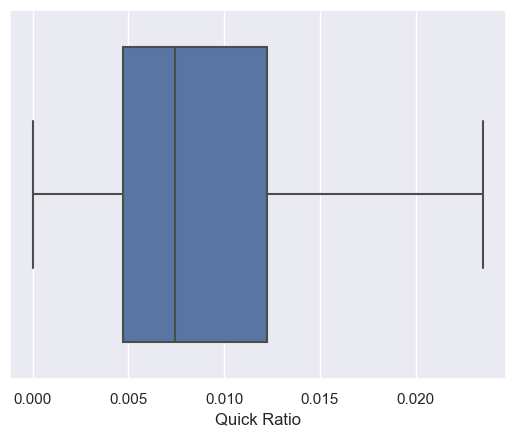

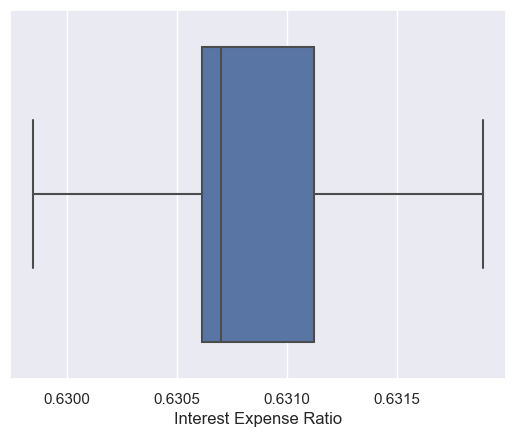

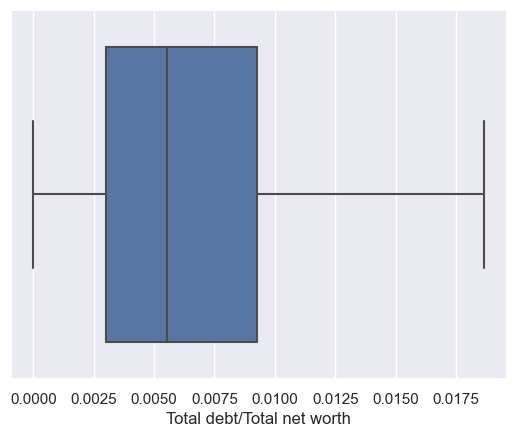

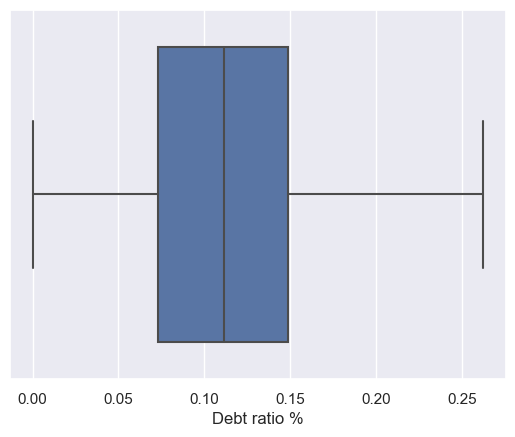

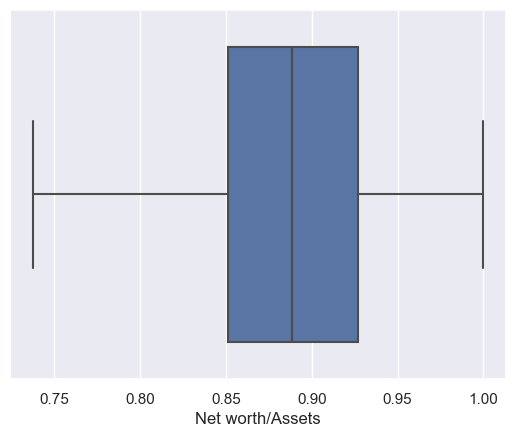

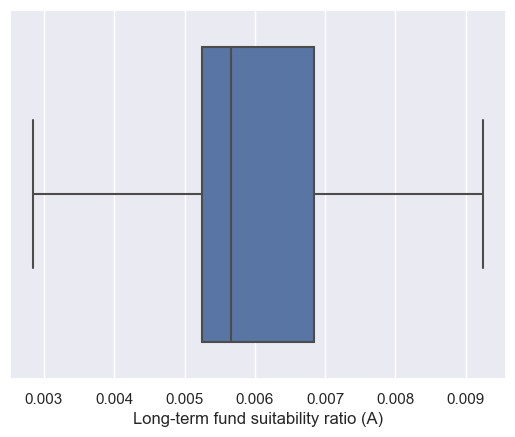

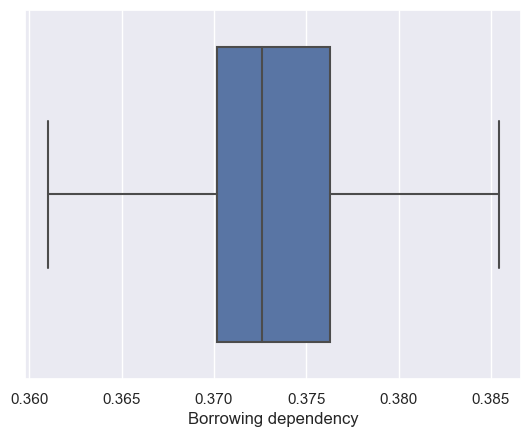

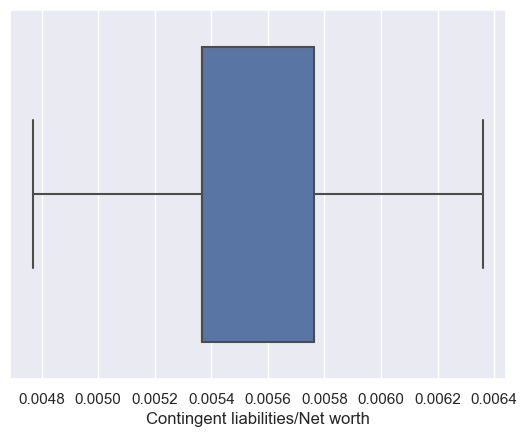

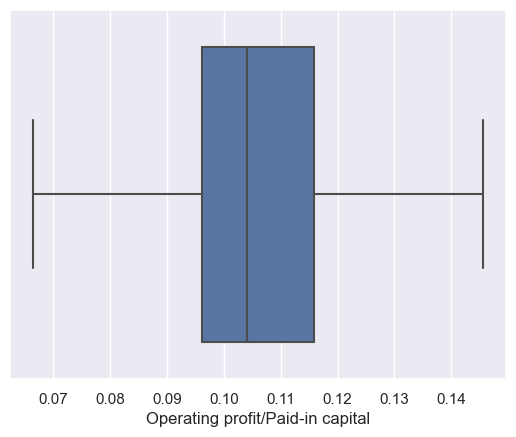

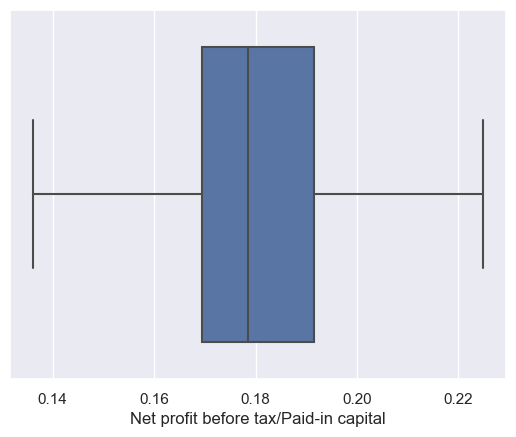

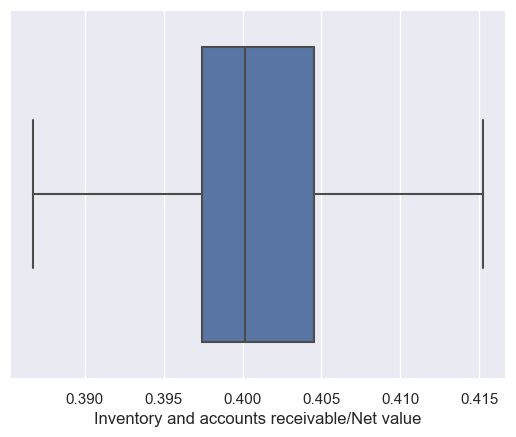

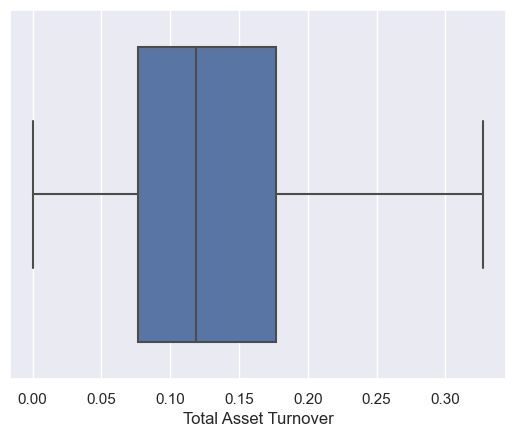

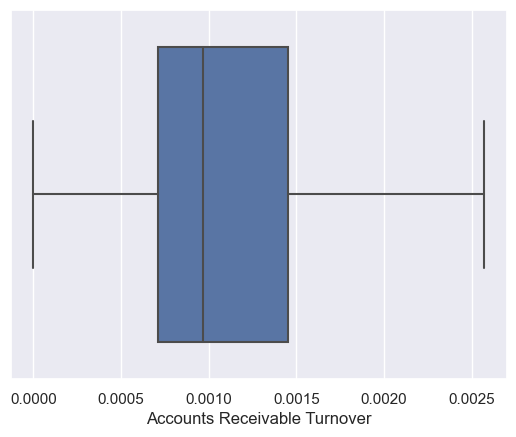

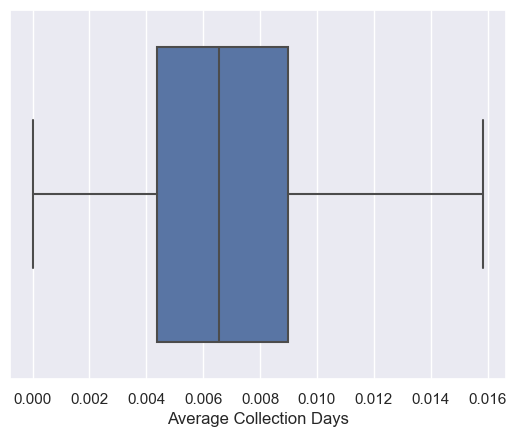

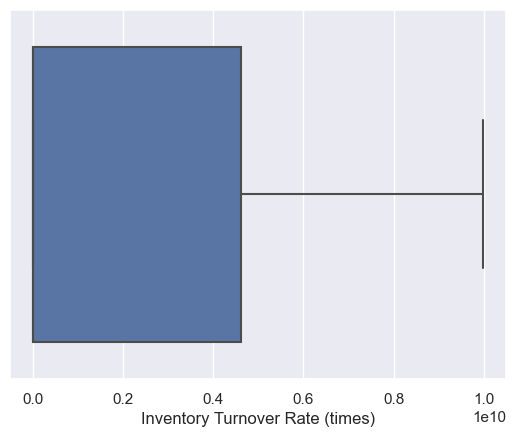

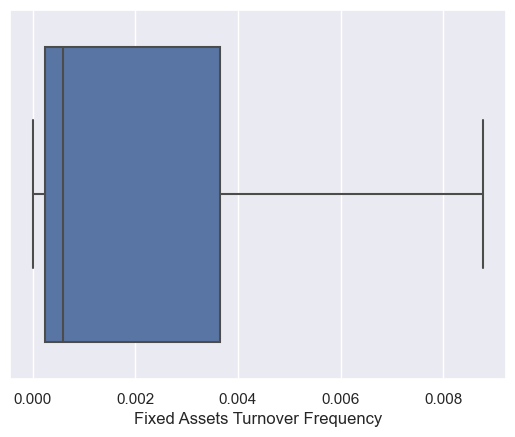

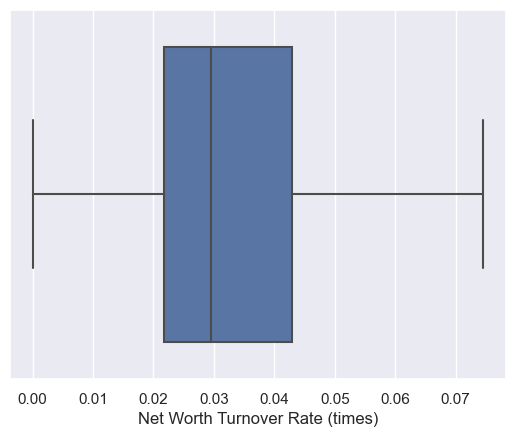

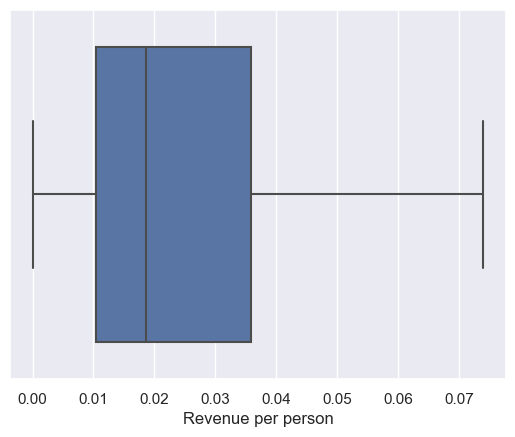

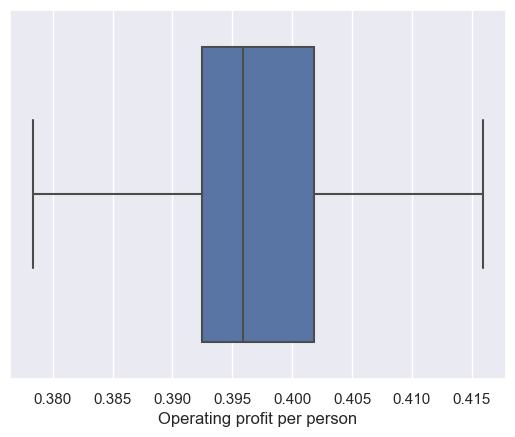

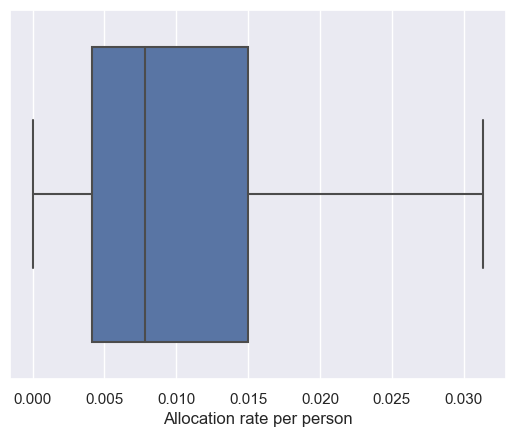

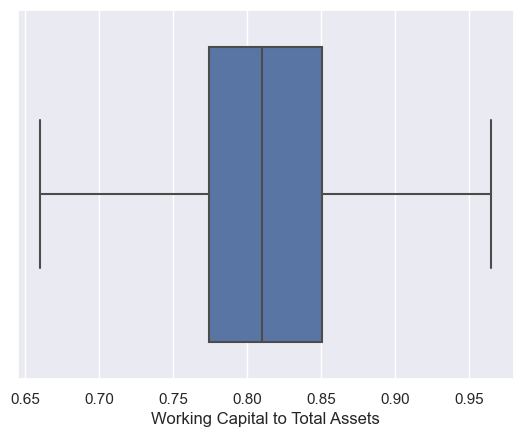

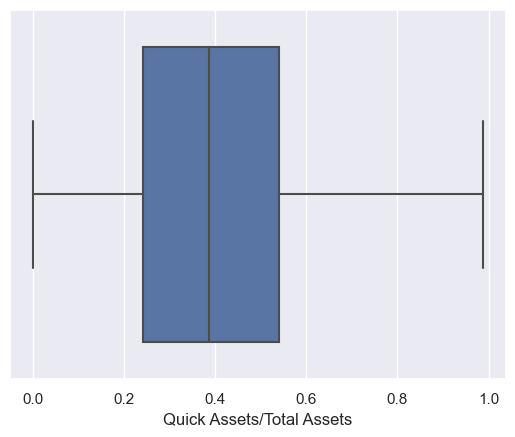

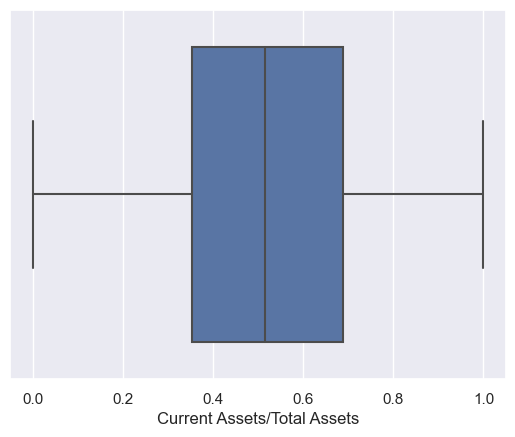

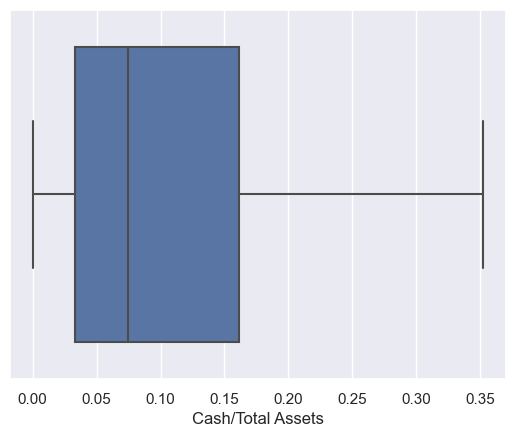

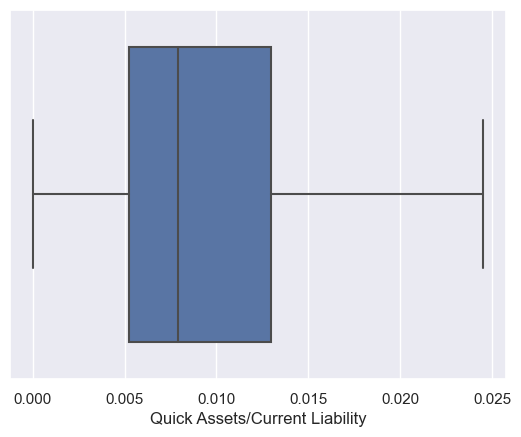

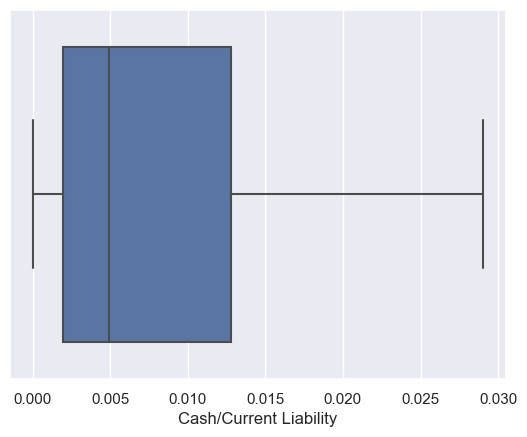

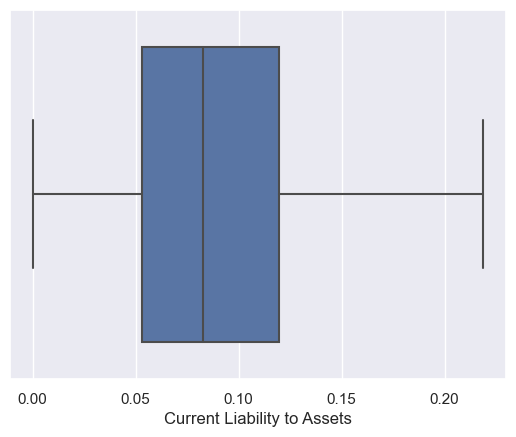

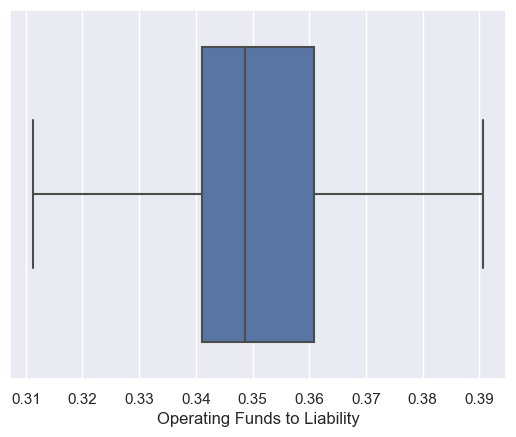

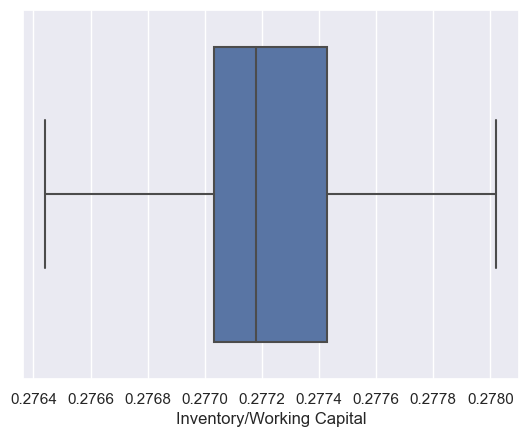

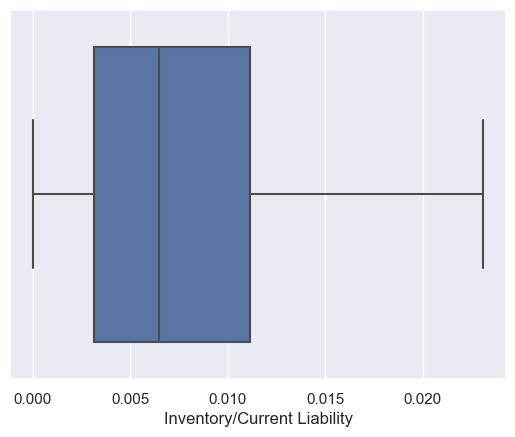

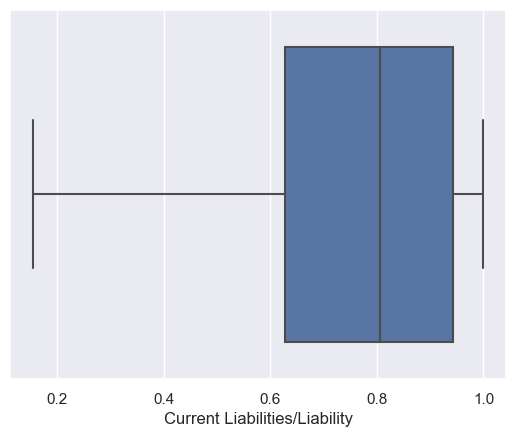

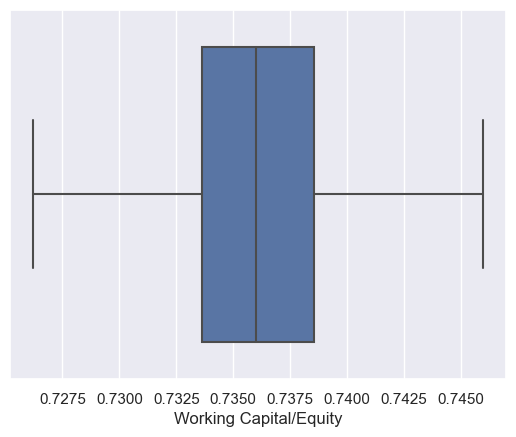

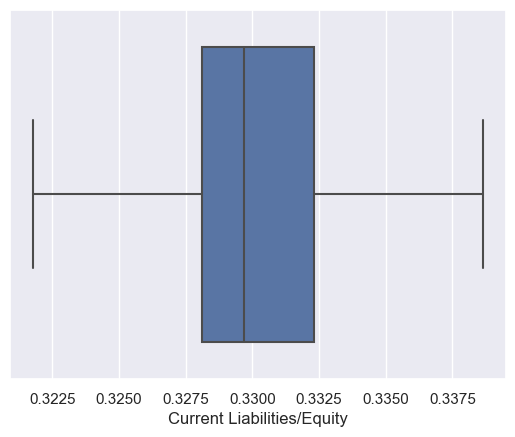

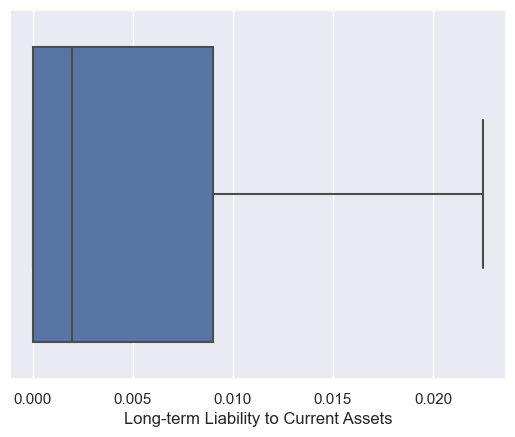

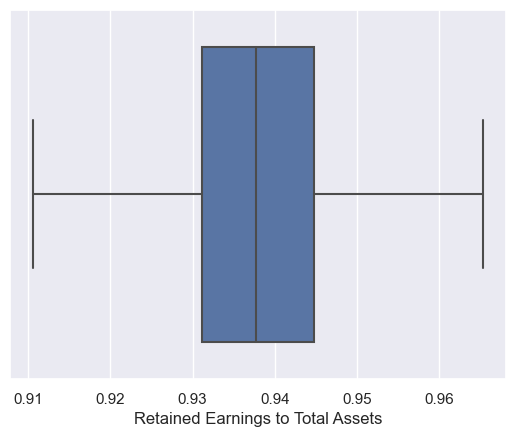

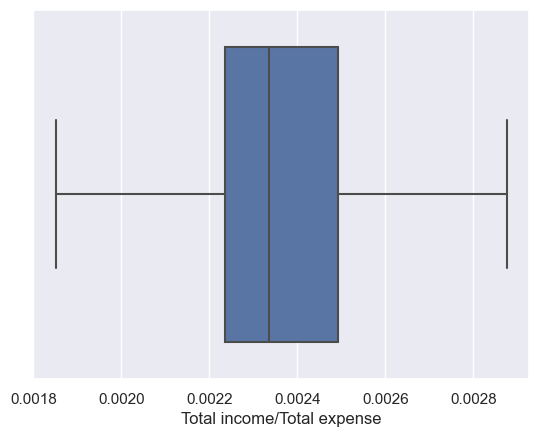

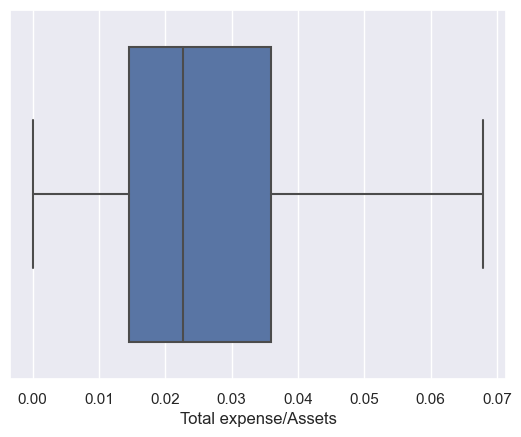

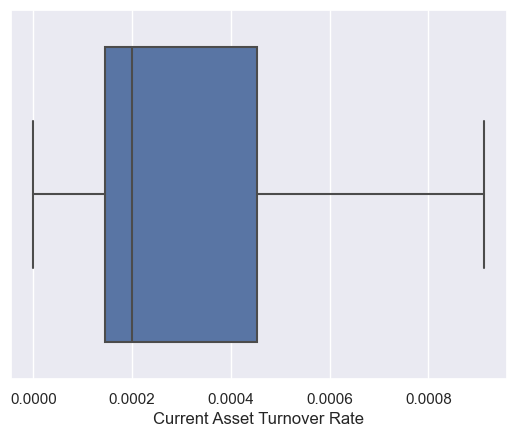

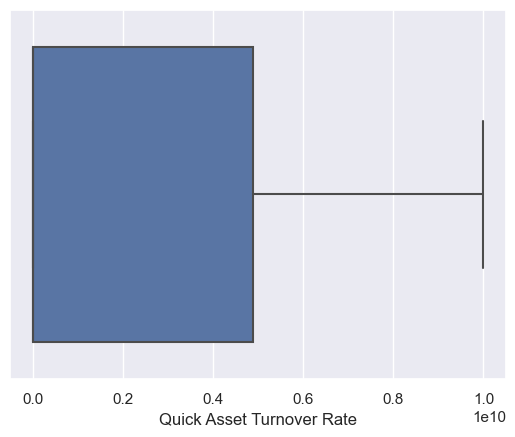

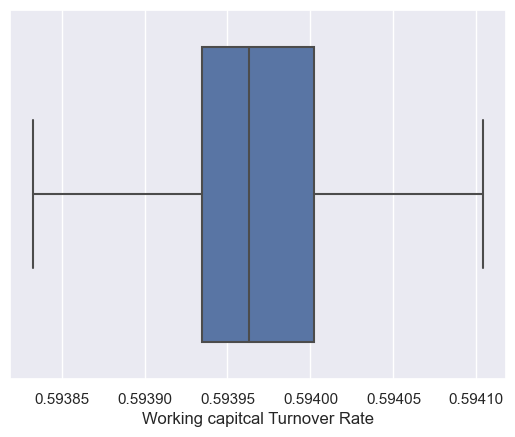

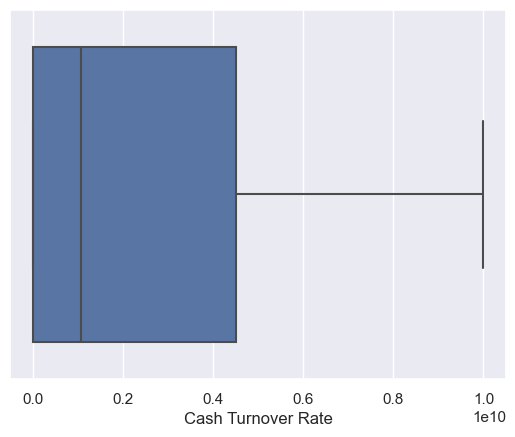

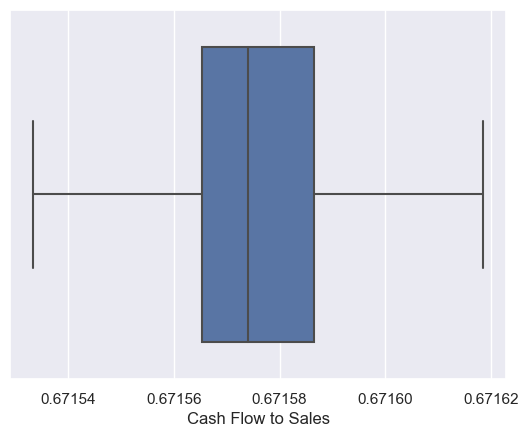

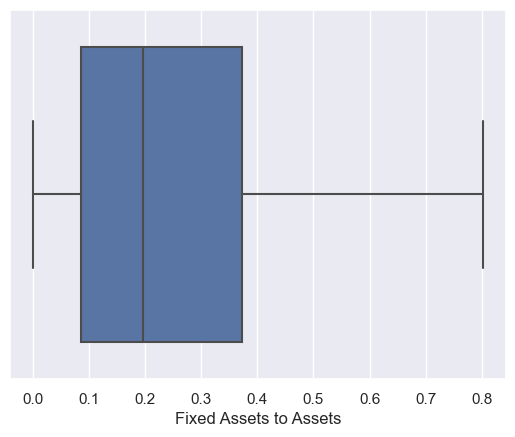

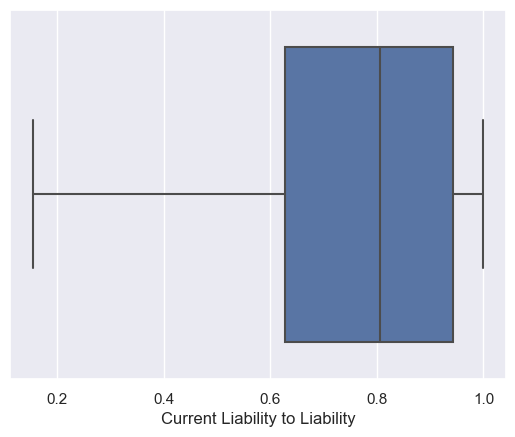

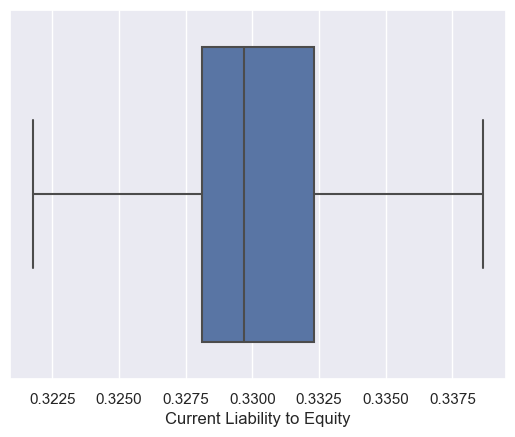

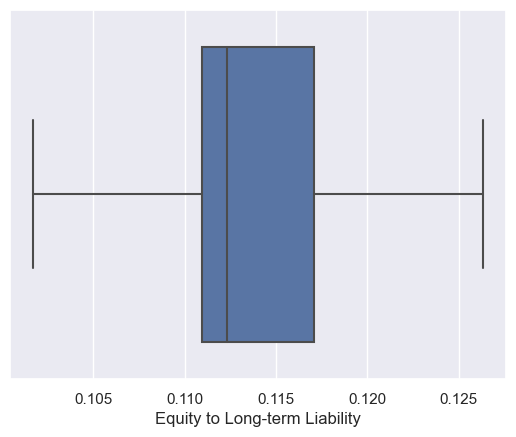

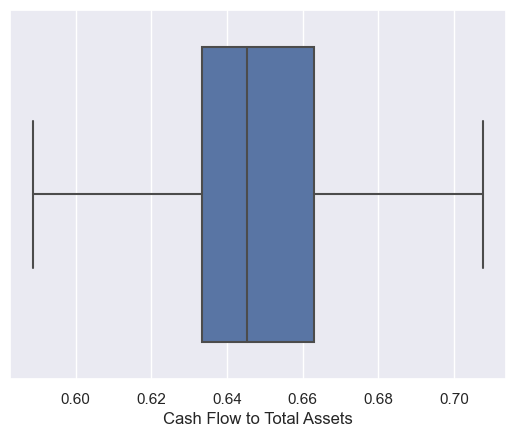

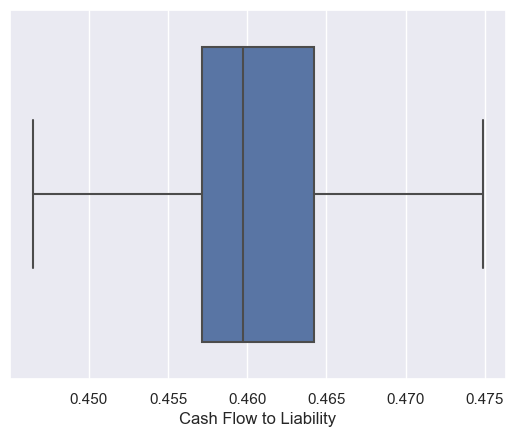

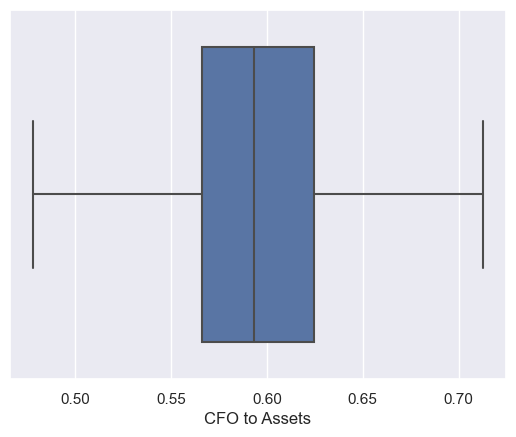

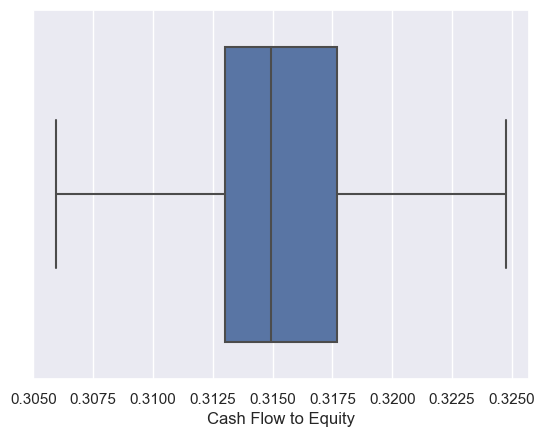

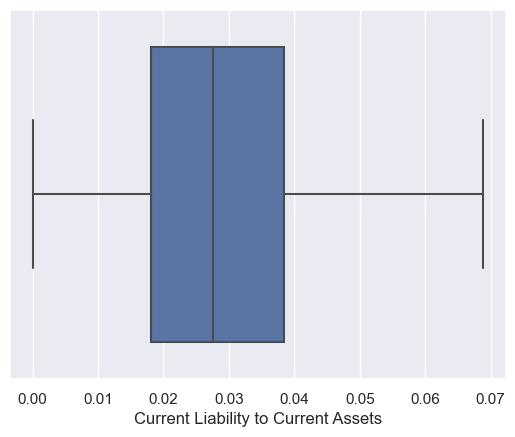

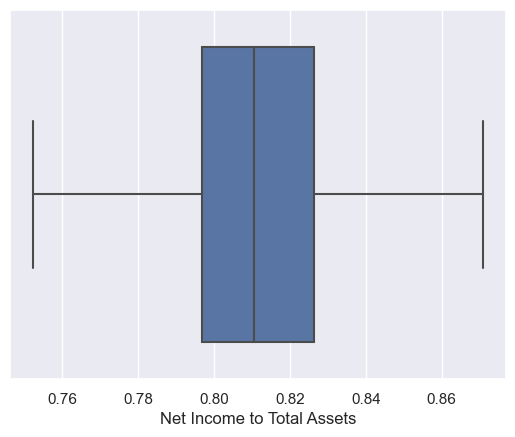

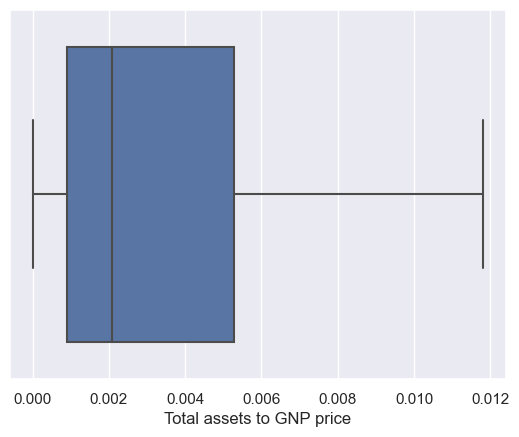

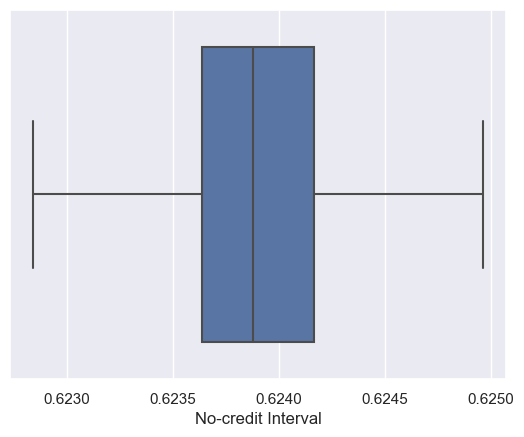

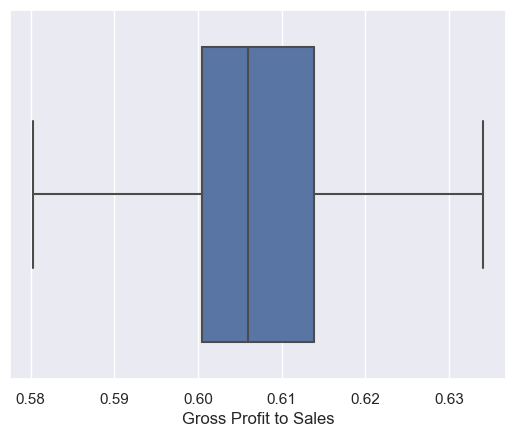

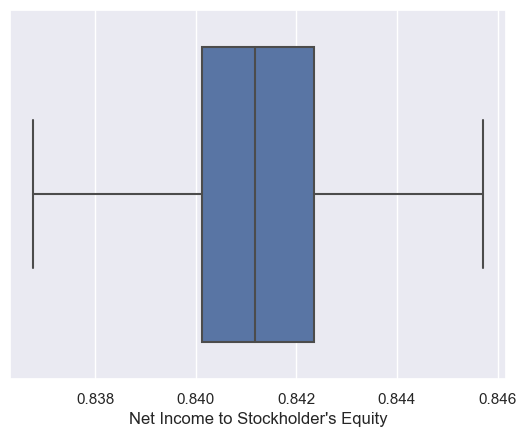

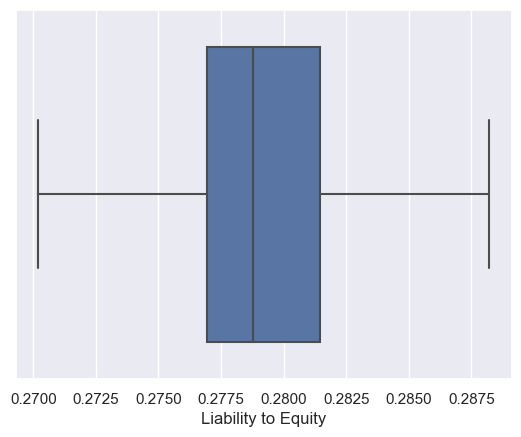

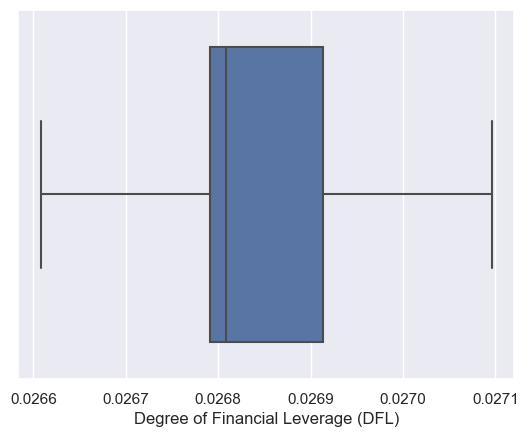

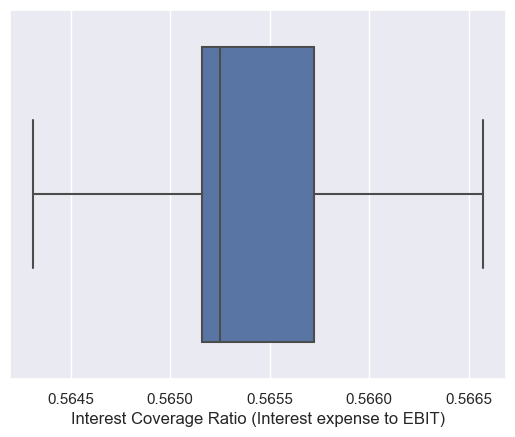

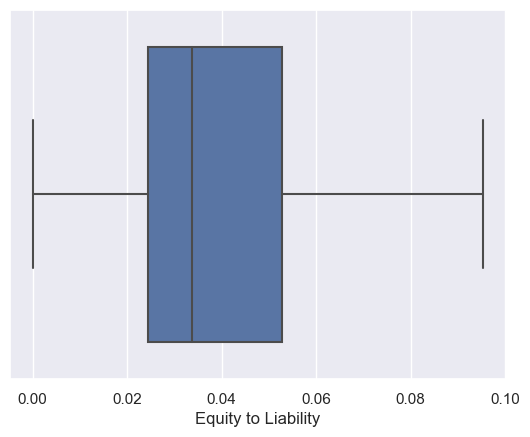

In [140]:
for i in updated_bank_data.columns:
        if i=='Bankrupt?':
            continue
        else:
            sb.boxplot(x = updated_bank_data[i])
            plt.show()

In [141]:
#Outliers has been taken care of and the data is now much easier to deal with

Feature Selection Using VIF - 
Variance Inflation Factor (VIF) is a statistical measure used to quantify the degree of 
multicollinearity (correlation) between the independent variables in a regression analysis.
In the context of feature selection, VIF can be used to identify and remove highly correlated features,
which can improve the accuracy and interpretability of the model.

By using VIF for feature selection, you can identify and remove highly correlated features, which can improve the accuracy and interpretability of the model. However, it's important to note that removing features can also result in a loss of information, so it's important to carefully evaluate the impact of each feature before removing it.

In [144]:
def cal_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    for i in range(1,k):
        print("Iteration no: ",i)
        print("VIF is: ",vif)
        a = np.argmax(vif)
        print("Max vif is for variable no: ",a)
        if(vif[a]<=thresh):
            break
        if (i==1):
            output = x.drop(x.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
        elif(i>1):
            output = output.drop(output.columns[a],axis=1)
            vif = [variance_inflation_factor(output.values,j) for j in range(output.shape[1])]
            
    return output

In [145]:
considered_features = updated_bank_data.drop('Bankrupt?',axis=1)
selected_features = cal_vif(considered_features)
selected_features.head()

Iteration no:  1
VIF is:  [111.062847641194, 136.1498363210979, 164.53684572562582, 16255138.662705759, 704.886624226324, 16.154491610173046, 92.49062986383383, 106.49891151707442, 4.550320731392678, 42.25839443431667, 1.4277969663482193, 1.169613826796778, 19.900785245485057, 1.1899639929284105, 2.0431581887738566, 1689.8127981689295, 3322.6991534503445, 1660.5808464843346, 86.584344806556, 11.967459910303354, 15.73553366004209, 867.5404249268023, 118.38172870702992, 3.2178976003705757, 4.036907323901486, 152.75414677800262, 153.6198151474445, 9.218747520221562, 1.162964644774037, 2.9884764830995123, 4.546106434681753, 11.713018284690808, 37.278965818833704, 30.088737190001723, 7.00368487554818, 41.92265575286091, 23604177.77718102, 22193678.25456166, 4.216045750501881, 9.152383247233898, 1.331304028748918, 860.9509059511076, 180.08943191795905, 15.32815520195269, 24.011153605114423, 3.933738776815269, 4.316097949064296, 1.2897233896432017, 1.8342072422684235, 25.28359866530554, 5.008

,Operating Gross Margin,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Revenue Per Share (Yuan ¥),Operating Profit Growth Rate,After-tax Net Profit Growth Rate,...,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Total assets to GNP price,No-credit Interval,Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.601457,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.017560,0.848195,0.688979,...,0.064856,0.000913,6.550000e+09,4.580000e+08,0.424206,0.126365,0.009219,0.622879,0.564309,0.016469
1,0.610235,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.021144,0.848088,0.689693,...,0.025516,0.000107,7.700000e+09,2.490000e+09,0.468828,0.120916,0.008323,0.623652,0.566574,0.020794
2,0.601450,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.193713,0.005944,0.848094,0.689463,...,0.021387,0.000913,1.022676e-03,7.610000e+08,0.276179,0.117922,0.011819,0.623841,0.564309,0.016474
3,0.583541,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.014368,0.848005,0.689110,...,0.024161,0.000913,6.050000e+09,2.030000e+09,0.559144,0.120760,0.003252,0.622929,0.564663,0.023982
4,0.598783,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.029690,0.848258,0.689697,...,0.026385,0.000913,5.050000e+09,8.240000e+08,0.309555,0.110933,0.003878,0.623521,0.566574,0.035490


Through the VIF method we were able to find 31 unique features/colummns

In [147]:
target_df = bank_data['Bankrupt?']

target_df.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

In [148]:
selection_df = pd.concat([selected_features,target_df],axis=1)
selection_df.head()

,Operating Gross Margin,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Revenue Per Share (Yuan ¥),Operating Profit Growth Rate,After-tax Net Profit Growth Rate,...,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Total assets to GNP price,No-credit Interval,Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.601457,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.017560,0.848195,0.688979,...,0.000913,6.550000e+09,4.580000e+08,0.424206,0.126365,0.009219,0.622879,0.564309,0.016469,1
1,0.610235,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.021144,0.848088,0.689693,...,0.000107,7.700000e+09,2.490000e+09,0.468828,0.120916,0.008323,0.623652,0.566574,0.020794,1
2,0.601450,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.193713,0.005944,0.848094,0.689463,...,0.000913,1.022676e-03,7.610000e+08,0.276179,0.117922,0.011819,0.623841,0.564309,0.016474,1
3,0.583541,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.014368,0.848005,0.689110,...,0.000913,6.050000e+09,2.030000e+09,0.559144,0.120760,0.003252,0.622929,0.564663,0.023982,1
4,0.598783,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.029690,0.848258,0.689697,...,0.000913,5.050000e+09,8.240000e+08,0.309555,0.110933,0.003878,0.623521,0.566574,0.035490,1


In [150]:
selection_df.shape

(6819, 34)

In [152]:
#Next we will apply the selected features using p-values
x = selection_df.drop(['Bankrupt?'],axis=1)
y = selection_df['Bankrupt?']

In [153]:
x.head()

,Operating Gross Margin,Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (C),Revenue Per Share (Yuan ¥),Operating Profit Growth Rate,After-tax Net Profit Growth Rate,...,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Equity to Long-term Liability,Total assets to GNP price,No-credit Interval,Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.601457,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.017560,0.848195,0.688979,...,0.064856,0.000913,6.550000e+09,4.580000e+08,0.424206,0.126365,0.009219,0.622879,0.564309,0.016469
1,0.610235,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.021144,0.848088,0.689693,...,0.025516,0.000107,7.700000e+09,2.490000e+09,0.468828,0.120916,0.008323,0.623652,0.566574,0.020794
2,0.601450,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.193713,0.005944,0.848094,0.689463,...,0.021387,0.000913,1.022676e-03,7.610000e+08,0.276179,0.117922,0.011819,0.623841,0.564309,0.016474
3,0.583541,1.078888e-04,0.0,0.465705,0.000449,0.0,0.154187,0.014368,0.848005,0.689110,...,0.024161,0.000913,6.050000e+09,2.030000e+09,0.559144,0.120760,0.003252,0.622929,0.564663,0.023982
4,0.598783,7.890000e+09,0.0,0.462746,0.000686,0.0,0.167502,0.029690,0.848258,0.689697,...,0.026385,0.000913,5.050000e+09,8.240000e+08,0.309555,0.110933,0.003878,0.623521,0.566574,0.035490


In [154]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Bankrupt?, dtype: int64

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=25)

In [158]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(5455, 33)
(5455,)
(1364, 33)
(1364,)


In [160]:
x_train_sm = sm.add_constant(x_train)

In [161]:
lr = sm.OLS(y_train,x_train_sm).fit()

In [162]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              Bankrupt?   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     31.20
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          2.98e-177
Time:                        19:01:03   Log-Likelihood:                 2174.2
No. Observations:                5455   AIC:                            -4280.
Df Residuals:                    5421   BIC:                            -4056.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

In [163]:
p_value_df = pd.DataFrame(lr.pvalues,columns=["P_Values"])

In [164]:
p_value_df

,P_Values
const,6.990972e-01
Operating Gross Margin,2.145272e-05
Operating Expense Rate,1.752491e-01
Research and development expense rate,4.193117e-02
Cash flow rate,7.870971e-03
Interest-bearing debt interest rate,3.233825e-06
Tax rate (A),2.452114e-01
Net Value Per Share (C),1.389450e-01
Revenue Per Share (Yuan ¥),9.984810e-03
Operating Profit Growth Rate,4.812227e-01


In [166]:
p_value_df.shape

(34, 1)

In [167]:
p_df = p_value_df[p_value_df['P_Values']<0.05]

In [168]:
p_df

,P_Values
Operating Gross Margin,2.145272e-05
Research and development expense rate,4.193117e-02
Cash flow rate,7.870971e-03
Interest-bearing debt interest rate,3.233825e-06
Revenue Per Share (Yuan ¥),9.984810e-03
Total Asset Growth Rate,2.704731e-02
Borrowing dependency,3.120931e-26
Average Collection Days,1.669569e-04
Fixed Assets Turnover Frequency,7.207881e-03
Allocation rate per person,2.861494e-05


In [169]:
p_df.shape

(17, 1)

In [170]:
p_df.index

Index(['Operating Gross Margin', 'Research and development expense rate',
       'Cash flow rate', 'Interest-bearing debt interest rate',
       'Revenue Per Share (Yuan ¥)', 'Total Asset Growth Rate',
       'Borrowing dependency', 'Average Collection Days',
       'Fixed Assets Turnover Frequency', 'Allocation rate per person',
       'Working Capital/Equity', 'Long-term Liability to Current Assets',
       'Total expense/Assets', 'Cash Turnover Rate', 'Fixed Assets to Assets',
       'Total assets to GNP price',
       'Interest Coverage Ratio (Interest expense to EBIT)'],
      dtype='object')

In [173]:
main_df = updated_bank_data.loc[:,['Operating Gross Margin', 'Operating Profit Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Revenue Per Share (Yuan ¥)',
       'Total Asset Growth Rate', 'Cash Reinvestment %',
       'Borrowing dependency', 'Average Collection Days',
       'Fixed Assets Turnover Frequency', 'Allocation rate per person',
       'Working Capital/Equity', 'Long-term Liability to Current Assets',
       'Total expense/Assets', 'Cash Turnover Rate',
       'Fixed Assets to Assets', 'Total assets to GNP price']]

In [174]:
main_df.shape

(6819, 18)

In [175]:
main_df.head()

,Operating Gross Margin,Operating Profit Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Cash Reinvestment %,Borrowing dependency,Average Collection Days,Fixed Assets Turnover Frequency,Allocation rate per person,Working Capital/Equity,Long-term Liability to Current Assets,Total expense/Assets,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
0,0.601457,0.998969,0.0,0.458143,0.000725,0.017560,4.980000e+09,0.363725,0.385425,0.003487,0.000117,0.031370,0.726190,0.022515,0.064856,4.580000e+08,0.424206,0.009219
1,0.610235,0.998946,0.0,0.461867,0.000647,0.021144,6.110000e+09,0.376709,0.376760,0.004917,0.008781,0.012335,0.731975,0.022515,0.025516,2.490000e+09,0.468828,0.008323
2,0.601450,0.998857,25500000.0,0.458521,0.000790,0.005944,7.280000e+09,0.368913,0.379093,0.004227,0.008781,0.031370,0.742729,0.003715,0.021387,7.610000e+08,0.276179,0.011819
3,0.583541,0.998781,0.0,0.465705,0.000449,0.014368,4.880000e+09,0.384077,0.379743,0.003215,0.008781,0.021320,0.729825,0.022165,0.024161,2.030000e+09,0.559144,0.003252
4,0.598783,0.998973,0.0,0.462746,0.000686,0.029690,5.510000e+09,0.379690,0.375025,0.004367,0.000294,0.023988,0.732000,0.000000,0.026385,8.240000e+08,0.309555,0.003878


In [176]:
final_df = pd.concat([main_df,target_df],axis=1)

In [177]:
final_df.shape

(6819, 19)

In [178]:
final_df.head()

,Operating Gross Margin,Operating Profit Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Cash Reinvestment %,Borrowing dependency,Average Collection Days,Fixed Assets Turnover Frequency,Allocation rate per person,Working Capital/Equity,Long-term Liability to Current Assets,Total expense/Assets,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price,Bankrupt?
0,0.601457,0.998969,0.0,0.458143,0.000725,0.017560,4.980000e+09,0.363725,0.385425,0.003487,0.000117,0.031370,0.726190,0.022515,0.064856,4.580000e+08,0.424206,0.009219,1
1,0.610235,0.998946,0.0,0.461867,0.000647,0.021144,6.110000e+09,0.376709,0.376760,0.004917,0.008781,0.012335,0.731975,0.022515,0.025516,2.490000e+09,0.468828,0.008323,1
2,0.601450,0.998857,25500000.0,0.458521,0.000790,0.005944,7.280000e+09,0.368913,0.379093,0.004227,0.008781,0.031370,0.742729,0.003715,0.021387,7.610000e+08,0.276179,0.011819,1
3,0.583541,0.998781,0.0,0.465705,0.000449,0.014368,4.880000e+09,0.384077,0.379743,0.003215,0.008781,0.021320,0.729825,0.022165,0.024161,2.030000e+09,0.559144,0.003252,1
4,0.598783,0.998973,0.0,0.462746,0.000686,0.029690,5.510000e+09,0.379690,0.375025,0.004367,0.000294,0.023988,0.732000,0.000000,0.026385,8.240000e+08,0.309555,0.003878,1


In [179]:
final_df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

So we have found the columns whose p-value is less than 5% or 0.05 and finally we have 18 independent columns for model prep

NOW Lets Perform EDA